In [18]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [19]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
# setting color code for Seaborn plots

sns.set(color_codes=True)

# <font color = blue> Credit EDA Case Study </font>

### <font color = black> Problem Statement - I </font>

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

* If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

* If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

###  Step 1: Reading the data

In [21]:
# Reading the csv file using 'read_csv'.
app_data = pd.read_csv("application_data.csv")
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

###  Step 2: Inspecting the Dataframe

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [22]:
# Checking the number of rows and columns in the dataframe

app_data.shape

(307511, 122)

In [23]:
# Setting data frame property to display all 122 columns

pd.set_option('display.max_columns', 125)
pd.set_option('display.max_rows', 500)

In [24]:
# Checking for null values in rows and columns in the dataframe
print(app_data.isnull().sum().sort_values(ascending = False))

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_MEDI        213514
NONLIVINGAPARTMENTS_AVG         213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MEDI           210199
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
FLOORSMIN_MEDI                  208642
FLOORSMIN_MODE                  208642
FLOORSMIN_AVG                   208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_AVG                 204488
YEARS_BUILD_MODE                204488
OWN_CAR_AGE                     202929
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
LANDAREA_MEDI                   182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MEDI              169682
NONLIVINGAREA_AVG        

In [25]:
# Total number of rows in input "application_data.csv" file

no_rows = len(app_data)

In [26]:
# Finding % of NULL values in each column

print(app_data.isnull().sum().sort_values(ascending = False)/no_rows * 100)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

###  Step 3: NULL / Missing value Handling

Inspecting the dataframe for NULL / Missing values to take necessary actions.

- ### 3.1: Creating three new data frames to hold columns that can be removed

In [27]:
# creating a data frame to hold all columns that ends with "_MEDI"

medi_df = app_data[app_data.filter(regex='.*\_MEDI$').columns]
medi_df.shape

(307511, 14)

In [28]:
medi_df.head()

APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  \
0           0.0250             0.0369                        0.9722   
1           0.0968             0.0529                        0.9851   
2              NaN                NaN                           NaN   
3              NaN                NaN                           NaN   
4              NaN                NaN                           NaN   

   YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  \
0            0.6243           0.0144            0.00          0.0690   
1            0.7987           0.0608            0.08          0.0345   
2               NaN              NaN             NaN             NaN   
3               NaN              NaN             NaN             NaN   
4               NaN              NaN             NaN             NaN   

   FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  \
0          0.0833          0.1250         0.0375                 0.0205   
1          0.2917          0.3333         0.0132                 0.0787   
2             NaN             NaN            NaN                    NaN   
3             NaN             NaN            NaN                    NaN   
4             NaN             NaN            NaN                    NaN   

   LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI  
0           0.0193                    0.0000                0.00  
1           0.0558                    0.0039                0.01  
2              NaN                       NaN                 NaN  
3              NaN                       NaN                 NaN  
4              NaN                       NaN                 NaN

In [29]:
# creating a data frame to hold all columns that ends with "_AVG"

avg_df = app_data[app_data.filter(regex='.*\_AVG$').columns]
print(avg_df.shape)
avg_df.head()

(307511, 14)


APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
0          0.0247            0.0369                       0.9722   
1          0.0959            0.0529                       0.9851   
2             NaN               NaN                          NaN   
3             NaN               NaN                          NaN   
4             NaN               NaN                          NaN   

   YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
0           0.6192          0.0143           0.00         0.0690   
1           0.7960          0.0605           0.08         0.0345   
2              NaN             NaN            NaN            NaN   
3              NaN             NaN            NaN            NaN   
4              NaN             NaN            NaN            NaN   

   FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  \
0         0.0833         0.1250        0.0369                0.0202   
1         0.2917         0.3333        0.0130                0.0773   
2            NaN            NaN           NaN                   NaN   
3            NaN            NaN           NaN                   NaN   
4            NaN            NaN           NaN                   NaN   

   LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  
0          0.0190                   0.0000             0.0000  
1          0.0549                   0.0039             0.0098  
2             NaN                      NaN                NaN  
3             NaN                      NaN                NaN  
4             NaN                      NaN                NaN

In [30]:
# creating a data frame to hold all columns that ends with "_MODE"

mode_df = app_data[app_data.filter(regex='.*\_MODE$').columns]
print(mode_df.shape)
mode_df.head()

(307511, 19)


APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  \
0           0.0252             0.0383                        0.9722   
1           0.0924             0.0538                        0.9851   
2              NaN                NaN                           NaN   
3              NaN                NaN                           NaN   
4              NaN                NaN                           NaN   

   YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  \
0            0.6341           0.0144          0.0000          0.0690   
1            0.8040           0.0497          0.0806          0.0345   
2               NaN              NaN             NaN             NaN   
3               NaN              NaN             NaN             NaN   
4               NaN              NaN             NaN             NaN   

   FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  \
0          0.0833          0.1250         0.0377                  0.022   
1          0.2917          0.3333         0.0128                  0.079   
2             NaN             NaN            NaN                    NaN   
3             NaN             NaN            NaN                    NaN   
4             NaN             NaN            NaN                    NaN   

   LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  \
0           0.0198                       0.0                 0.0   
1           0.0554                       0.0                 0.0   
2              NaN                       NaN                 NaN   
3              NaN                       NaN                 NaN   
4              NaN                       NaN                 NaN   

  FONDKAPREMONT_MODE  HOUSETYPE_MODE  TOTALAREA_MODE WALLSMATERIAL_MODE  \
0   reg oper account  block of flats          0.0149       Stone, brick   
1   reg oper account  block of flats          0.0714              Block   
2                NaN             NaN             NaN                NaN   
3                NaN             NaN             NaN                NaN   
4                NaN             NaN             NaN                NaN   

  EMERGENCYSTATE_MODE  
0                  No  
1                  No  
2                 NaN  
3                 NaN  
4                 NaN

- ###  3.2: Checking % NULL values in each column in newly created data frames to find the ones that can be removed

In [31]:
# Finding % of NULL values in each column on medi_df

print(medi_df.isnull().sum().sort_values(ascending = False)/no_rows * 100)

COMMONAREA_MEDI                 69.872297
NONLIVINGAPARTMENTS_MEDI        69.432963
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
NONLIVINGAREA_MEDI              55.179164
ELEVATORS_MEDI                  53.295980
APARTMENTS_MEDI                 50.749729
ENTRANCES_MEDI                  50.348768
LIVINGAREA_MEDI                 50.193326
FLOORSMAX_MEDI                  49.760822
YEARS_BEGINEXPLUATATION_MEDI    48.781019
dtype: float64


In [32]:
# Finding % of NULL values in each column on avg_df

print(avg_df.isnull().sum().sort_values(ascending = False)/no_rows * 100)

COMMONAREA_AVG                 69.872297
NONLIVINGAPARTMENTS_AVG        69.432963
LIVINGAPARTMENTS_AVG           68.354953
FLOORSMIN_AVG                  67.848630
YEARS_BUILD_AVG                66.497784
LANDAREA_AVG                   59.376738
BASEMENTAREA_AVG               58.515956
NONLIVINGAREA_AVG              55.179164
ELEVATORS_AVG                  53.295980
APARTMENTS_AVG                 50.749729
ENTRANCES_AVG                  50.348768
LIVINGAREA_AVG                 50.193326
FLOORSMAX_AVG                  49.760822
YEARS_BEGINEXPLUATATION_AVG    48.781019
dtype: float64


In [33]:
# Finding % of NULL values in each column on mode_df

print(mode_df.isnull().sum().sort_values(ascending = False)/no_rows * 100)

COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
FLOORSMIN_MODE                  67.848630
YEARS_BUILD_MODE                66.497784
LANDAREA_MODE                   59.376738
BASEMENTAREA_MODE               58.515956
NONLIVINGAREA_MODE              55.179164
ELEVATORS_MODE                  53.295980
WALLSMATERIAL_MODE              50.840783
APARTMENTS_MODE                 50.749729
ENTRANCES_MODE                  50.348768
LIVINGAREA_MODE                 50.193326
HOUSETYPE_MODE                  50.176091
FLOORSMAX_MODE                  49.760822
YEARS_BEGINEXPLUATATION_MODE    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
dtype: float64


- ###  3.3: Removing columns identified columns from app_data data frame

In [34]:
print('Table shape before removing columns that ends with "_MEDI": ', app_data.shape)

Table shape before removing columns that ends with "_MEDI":  (307511, 122)


In [35]:
app_data.drop(app_data.filter(regex='.*\_MEDI$').columns, axis = 1, inplace = True)

In [36]:
print('Table shape after removing columns that ends with "_MEDI": ', app_data.shape)

Table shape after removing columns that ends with "_MEDI":  (307511, 108)


In [37]:
print('Table shape before removing columns that ends with "_AVG": ', app_data.shape)

Table shape before removing columns that ends with "_AVG":  (307511, 108)


In [38]:
app_data.drop(app_data.filter(regex='.*\_AVG$').columns, axis = 1, inplace = True)

In [39]:
print('Table shape after removing columns that ends with "_AVG": ', app_data.shape)

Table shape after removing columns that ends with "_AVG":  (307511, 94)


In [40]:
print('Table shape before removing columns that ends with "_MODE": ', app_data.shape)

Table shape before removing columns that ends with "_MODE":  (307511, 94)


In [41]:
app_data.drop(app_data.filter(regex='.*\_MODE$').columns, axis = 1, inplace = True)

In [42]:
print('Table shape after removing columns that ends with "_MODE": ', app_data.shape)

Table shape after removing columns that ends with "_MODE":  (307511, 75)


In [43]:
# Finding % of NULL values in each column

print(app_data.isnull().sum().sort_values(ascending = False).head(25)/no_rows * 100)

OWN_CAR_AGE                   65.990810
EXT_SOURCE_1                  56.381073
OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
NAME_TYPE_SUITE                0.420148
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
NAME_FAMILY_STATUS             0.000000
FLAG_OWN_REALTY                0.000000
TARGET                         0.000000
FLAG_EMAIL                     0.000000
FLAG_PHONE                     0.000000


In [44]:
# Checking for null values in rows and columns in the dataframe

print(app_data.isnull().sum().sort_values(ascending = False).head(25))

OWN_CAR_AGE                   202929
EXT_SOURCE_1                  173378
OCCUPATION_TYPE                96391
EXT_SOURCE_3                   60965
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
AMT_REQ_CREDIT_BUREAU_HOUR     41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
NAME_TYPE_SUITE                 1292
DEF_60_CNT_SOCIAL_CIRCLE        1021
OBS_30_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
EXT_SOURCE_2                     660
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
CNT_FAM_MEMBERS                    2
DAYS_LAST_PHONE_CHANGE             1
NAME_FAMILY_STATUS                 0
FLAG_OWN_REALTY                    0
TARGET                             0
FLAG_EMAIL                         0
FLAG_PHONE                         0
dtype: int64


- ###  3.4: Validating data in OWN_CAR_AGE column

In [45]:
#Comparing OWN_CAR_AGE against FLAG_OWN_CAR

app_data[['FLAG_OWN_CAR','OWN_CAR_AGE']].groupby('FLAG_OWN_CAR').count()

OWN_CAR_AGE
FLAG_OWN_CAR             
N                       0
Y                  104582

- __Decision__: OWN_CAR_AGE column has NULL only for customers who don't own a car, hence they are __valid data__.  So no need for removing the column or Imputing.  

- ###  3.5: Validating data in OCCUPATION_TYPE column

In [46]:
# Inspecting OCCUPATION_TYPE column by comparing it against NAME_INCOME_TYPE column

app_data[['NAME_INCOME_TYPE','OCCUPATION_TYPE']].head()

NAME_INCOME_TYPE OCCUPATION_TYPE
0          Working        Laborers
1    State servant      Core staff
2          Working        Laborers
3          Working        Laborers
4          Working      Core staff

In [47]:
# Checking for NULL count in NAME_INCOME_TYPE and OCCUPATION_TYPE columns

app_data[['NAME_INCOME_TYPE','OCCUPATION_TYPE']].isnull().sum()

NAME_INCOME_TYPE        0
OCCUPATION_TYPE     96391
dtype: int64

In [48]:
# Checking for NULL values in OCCUPATION_TYPE for each unique value in NAME_INCOME_TYPE column

app_data[app_data['OCCUPATION_TYPE'].isnull()]['NAME_INCOME_TYPE'].value_counts()

Pensioner               55357
Working                 24920
Commercial associate    12297
State servant            3787
Unemployed                 22
Student                     5
Businessman                 2
Maternity leave             1
Name: NAME_INCOME_TYPE, dtype: int64

- __Decision__: Out of 96,391 rows with NULL values
    1. 55,357 corresponds to NAME_INCOME_TYPE of "Pensioner'.  Since they aren't working we can leave those as is.
    2. 22 corresponds to NAME_INCOME_TYPE of "Unemployed'.  Since they aren't working we can leave those as is.
    3. For remaining replace NULL with MODE value

In [49]:
# Finding most common OCCUPATION_TYPE

app_data['OCCUPATION_TYPE'].value_counts(normalize = True)

Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

In [50]:
# Replacing most common OCCUPATION_TYPE for rows with NULL value except for NAME_INCOME_TYPE of "Pensioner' & "Unemployed' 

app_data.loc[~app_data['NAME_INCOME_TYPE'].isin(['Pensioner','Unemployed']), 'OCCUPATION_TYPE'] = app_data[~app_data['NAME_INCOME_TYPE'].isin(['Pensioner','Unemployed'])]['OCCUPATION_TYPE'].fillna(app_data['OCCUPATION_TYPE'].mode()[0])


In [51]:
# Checking for NULL values in OCCUPATION_TYPE for each unique value in NAME_INCOME_TYPE column after replacing NULL with MODE

app_data[app_data['OCCUPATION_TYPE'].isna()]['NAME_INCOME_TYPE'].value_counts()

Pensioner     55357
Unemployed       22
Name: NAME_INCOME_TYPE, dtype: int64

- ###  3.6: Validating data in ORGANIZATION_TYPE column

In [52]:
# Inspecting ORGANIZATION_TYPE column

app_data['ORGANIZATION_TYPE'].isna().sum()

0

In [53]:
app_data['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

- __Decision__: 'XNA' in column ORGANIZATION_TYPE represents NULL, hence replace it with NULL

In [54]:
#Replacing 'XNA' with NaN

app_data['ORGANIZATION_TYPE'] = app_data['ORGANIZATION_TYPE'].replace('XNA',np.nan)

In [55]:
app_data['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

In [56]:
app_data['ORGANIZATION_TYPE'].isnull().sum()

55374

In [57]:
app_data[app_data['ORGANIZATION_TYPE'].isnull()]['NAME_INCOME_TYPE'].value_counts()

Pensioner     55352
Unemployed       22
Name: NAME_INCOME_TYPE, dtype: int64

- __Note__: Only Pensioners and Unemployed customers has ORGANIZATION_TYPE has NULL, which is a valid data

- ###  3.7: Validating data in NAME_TYPE_SUITE column

In [58]:
app_data['NAME_TYPE_SUITE'].isnull().sum()

1292

In [59]:
app_data.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

- __Decision__: Since only very few rows has NULL in NAME_TYPE_SUITE, we can replace it with MODE

In [60]:
# Replacing NULL in column NAME_TYPE_SUITE with most common value

app_data['NAME_TYPE_SUITE'].fillna(app_data['NAME_TYPE_SUITE'].mode()[0], inplace=True)


In [61]:
# Checking for NULL value in NAME_TYPE_SUITE after replacing it with MODE

app_data['NAME_TYPE_SUITE'].isnull().sum()

0

- ###  3.8: Validating data in AMT_GOODS_PRICE column

In [62]:
app_data.AMT_GOODS_PRICE.isnull().sum()

278

In [63]:
# Comparing rows having NULL in AMT_GOODS_PRICE with NAME_CONTRACT_TYPE column

app_data[app_data.AMT_GOODS_PRICE.isnull()]['NAME_CONTRACT_TYPE'].value_counts()

Revolving loans    278
Name: NAME_CONTRACT_TYPE, dtype: int64

- __Note__: All rows that has NULL in AMT_GOODS_PRICE column corresponds to NAME_CONTRACT_TYPE as Revolving loans

In [64]:
# Inspecting NAME_CONTRACT_TYPE, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE columns

app_data[app_data['NAME_CONTRACT_TYPE'] == 'Revolving loans'][['NAME_CONTRACT_TYPE','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']].head()

NAME_CONTRACT_TYPE  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE
2     Revolving loans    135000.0       6750.0         135000.0
9     Revolving loans    405000.0      20250.0         405000.0
17    Revolving loans    270000.0      13500.0         270000.0
18    Revolving loans    157500.0       7875.0         157500.0
20    Revolving loans    427500.0      21375.0         427500.0

In [65]:
# Records having NAME_CONTRACT_TYPE as "Revolving loans" and AMT_CREDIT not equal to AMT_GOODS_PRICE and AMT_GOODS_PRICE as NULL

app_data[(app_data['NAME_CONTRACT_TYPE'] == 'Revolving loans') & (app_data['AMT_CREDIT'] != app_data['AMT_GOODS_PRICE']) & (~ app_data.AMT_GOODS_PRICE.isna())][['NAME_CONTRACT_TYPE','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']].head()

NAME_CONTRACT_TYPE  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE
1942    Revolving loans    315000.0      15750.0         450000.0
2138    Revolving loans    135000.0       6750.0         202500.0
2612    Revolving loans    360000.0      18000.0         337500.0
2808    Revolving loans    337500.0      16875.0         540000.0
3769    Revolving loans    135000.0       6750.0         382500.0

In [66]:
# Records having NAME_CONTRACT_TYPE as "Revolving loans" and AMT_CREDIT not equal to AMT_GOODS_PRICE and AMT_GOODS_PRICE as NULL

len(app_data[(app_data['NAME_CONTRACT_TYPE'] == 'Revolving loans') & (app_data['AMT_CREDIT'] != app_data['AMT_GOODS_PRICE']) & (~ app_data.AMT_GOODS_PRICE.isnull())])

328

In [67]:
# Records having NAME_CONTRACT_TYPE as "Revolving loans" and AMT_CREDIT less than AMT_GOODS_PRICE and AMT_GOODS_PRICE as NULL

len(app_data[(app_data['NAME_CONTRACT_TYPE'] == 'Revolving loans') & (app_data['AMT_CREDIT'] < app_data['AMT_GOODS_PRICE']) & (~ app_data.AMT_GOODS_PRICE.isnull())])

260

In [68]:
# Records having NAME_CONTRACT_TYPE as "Revolving loans" and AMT_CREDIT greater than AMT_GOODS_PRICE and AMT_GOODS_PRICE as NULL

len(app_data[(app_data['NAME_CONTRACT_TYPE'] == 'Revolving loans') & (app_data['AMT_CREDIT'] > app_data['AMT_GOODS_PRICE']) & (~ app_data.AMT_GOODS_PRICE.isnull())])

68

In [69]:
# Records having NAME_CONTRACT_TYPE as "Revolving loans" and AMT_CREDIT not equal to AMT_GOODS_PRICE

len(app_data[(app_data['NAME_CONTRACT_TYPE'] == 'Revolving loans') & (app_data['AMT_CREDIT'] != app_data['AMT_GOODS_PRICE'])])

606

In [70]:
# Records having NAME_CONTRACT_TYPE as "Revolving loans" and AMT_CREDIT less than AMT_GOODS_PRICE

len(app_data[(app_data['NAME_CONTRACT_TYPE'] == 'Revolving loans') & (app_data['AMT_CREDIT'] < app_data['AMT_GOODS_PRICE'])])

260

In [71]:
# Records having NAME_CONTRACT_TYPE as "Revolving loans" and AMT_CREDIT greater than AMT_GOODS_PRICE

len(app_data[(app_data['NAME_CONTRACT_TYPE'] == 'Revolving loans') & (app_data['AMT_CREDIT'] > app_data['AMT_GOODS_PRICE'])])

68

- __Decision__: Since most of the Revolving loans has AMT_CREDIT equal to AMT_GOODS_PRICE we feel comfortable to replaces NULL values in AMT_GOODS_PRICE with corresponding AMT_CREDIT

In [72]:
# Replacing NULL in column AMT_GOODS_PRICE with corresponding value in AMT_CREDIT column

app_data.loc[app_data['NAME_CONTRACT_TYPE'] == 'Revolving loans', 'AMT_GOODS_PRICE'] = app_data[app_data['NAME_CONTRACT_TYPE'] == 'Revolving loans']['AMT_CREDIT']

In [73]:
app_data.AMT_GOODS_PRICE.isnull().sum()

0

In [74]:
# Records having NAME_CONTRACT_TYPE as "Revolving loans" and AMT_CREDIT not equal to AMT_GOODS_PRICE

len(app_data[(app_data['NAME_CONTRACT_TYPE'] == 'Revolving loans') & (app_data['AMT_CREDIT'] != app_data['AMT_GOODS_PRICE'])])

0

- ###  3.9: Validating data in AMT_REQ_CREDIT_BUREAU_QRT column

In [75]:
app_data.AMT_REQ_CREDIT_BUREAU_QRT.isnull().sum()

41519

In [76]:
app_data.AMT_REQ_CREDIT_BUREAU_QRT.describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [77]:
app_data.AMT_REQ_CREDIT_BUREAU_QRT.value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
7.0           7
8.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

- __Decision__: Since most of the customers has AMT_REQ_CREDIT_BUREAU_QRT equal to 0 we feel comfortable to replaces NULL values with 0

In [78]:
# Replacing NULL values in AMT_REQ_CREDIT_BUREAU_QRT with 0

app_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0, inplace=True)

In [79]:
# Checking for NULL values in column AMT_REQ_CREDIT_BUREAU_QRT

app_data.AMT_REQ_CREDIT_BUREAU_QRT.isnull().sum()

0

In [80]:
app_data.AMT_REQ_CREDIT_BUREAU_QRT.describe()

count    307511.000000
mean          0.229631
std           0.744059
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [81]:
app_data.AMT_REQ_CREDIT_BUREAU_QRT.value_counts()

0.0      256936
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
7.0           7
8.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

- ###  3.10: Validating data in AMT_REQ_CREDIT_BUREAU_HOUR column

In [82]:
app_data.AMT_REQ_CREDIT_BUREAU_HOUR.isnull().sum()

41519

In [83]:
app_data.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

- __Decision__: Since most of the customers has AMT_REQ_CREDIT_BUREAU_HOUR equal to 0 we feel comfortable to replaces NULL values with 0

In [84]:
# Replacing NULL values in AMT_REQ_CREDIT_BUREAU_HOUR with 0

app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0, inplace=True)

In [85]:
app_data.AMT_REQ_CREDIT_BUREAU_HOUR.isnull().sum()

0

In [86]:
app_data.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()

0.0    305885
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

- ###  3.11: Validating data in AMT_REQ_CREDIT_BUREAU_DAY column

In [87]:
app_data.AMT_REQ_CREDIT_BUREAU_DAY.isnull().sum()

41519

In [88]:
app_data.AMT_REQ_CREDIT_BUREAU_DAY.value_counts()

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

- __Decision__: Since most of the customers has AMT_REQ_CREDIT_BUREAU_DAY equal to 0 we feel comfortable to replaces NULL values with 0

In [89]:
# Replacing NULL values in AMT_REQ_CREDIT_BUREAU_DAY with 0

app_data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(0, inplace=True)

In [90]:
app_data.AMT_REQ_CREDIT_BUREAU_DAY.isnull().sum()

0

In [91]:
app_data.AMT_REQ_CREDIT_BUREAU_DAY.value_counts()

0.0    306022
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [92]:
app_data.AMT_REQ_CREDIT_BUREAU_WEEK.isnull().sum()

41519

In [93]:
app_data.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts()

0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [94]:
# Replacing NULL values in AMT_REQ_CREDIT_BUREAU_WEEK with 0

app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0, inplace=True)

In [95]:
app_data.AMT_REQ_CREDIT_BUREAU_MON.isnull().sum()

41519

In [96]:
app_data.AMT_REQ_CREDIT_BUREAU_MON.value_counts()

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
27.0         1
22.0         1
23.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [97]:
# Replacing NULL values in AMT_REQ_CREDIT_BUREAU_MON with 0

app_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0, inplace=True)

In [98]:
app_data.AMT_REQ_CREDIT_BUREAU_MON.isnull().sum()

0

In [99]:
app_data.AMT_REQ_CREDIT_BUREAU_MON.value_counts()

0.0     263752
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
27.0         1
22.0         1
23.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [100]:
app_data.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().sum()

41519

In [101]:
app_data.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
21.0        1
23.0        1
25.0        1
20.0        1
22.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [102]:
# Replacing NULL values in AMT_REQ_CREDIT_BUREAU_YEAR with 0

app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0, inplace=True)

In [103]:
app_data.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().sum()

0

In [104]:
app_data.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

0.0     113320
1.0      63405
2.0      50192
3.0      33628
4.0      20714
5.0      12052
6.0       6967
7.0       3869
8.0       2127
9.0       1096
11.0        31
12.0        30
10.0        22
13.0        19
14.0        10
17.0         7
15.0         6
19.0         4
18.0         4
16.0         3
21.0         1
23.0         1
25.0         1
20.0         1
22.0         1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

###  Step 4: Univariate Analysis

Analysing one column at a time

- ###  4.1: Analysing SK_ID_CURR Analysis

In [105]:
#Checking for duplicate values

app_data['SK_ID_CURR'].value_counts().sort_values(ascending = False)

100401    1
182361    1
151626    1
147528    1
286860    1
         ..
116679    1
114632    1
112585    1
110538    1
100303    1
Name: SK_ID_CURR, Length: 307511, dtype: int64

- __Note__: Clean data and without any issues

- ###  4.2: Analysing TARGET Analysis

In [106]:
app_data['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

- __Note__: Clean data and without any issues

- ###  4.3: Analysing NAME_CONTRACT_TYPE Analysis

In [107]:
app_data['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

- __Note__: Clean data and without any issues

- ###  4.4: Analysing CODE_GENDER Analysis

In [108]:
app_data['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

- __Note__: Has "XNA", which can be replaced with "F"

In [109]:
app_data['CODE_GENDER'] = app_data['CODE_GENDER'].replace('XNA','F')

In [110]:
app_data['CODE_GENDER'].value_counts(normalize=True)

F    0.658357
M    0.341643
Name: CODE_GENDER, dtype: float64

- __Note__: No. of Female applicants is double the no. of Male applicants

- ###  4.5: Analysing FLAG_OWN_CAR Analysis

In [111]:
app_data['FLAG_OWN_CAR'].value_counts(normalize=True)

N    0.659892
Y    0.340108
Name: FLAG_OWN_CAR, dtype: float64

- __Note__: 34% of applicants own a car

- ###  4.6: Analysing FLAG_OWN_REALTY Analysis

In [112]:
app_data['FLAG_OWN_REALTY'].value_counts(normalize=True)

Y    0.693673
N    0.306327
Name: FLAG_OWN_REALTY, dtype: float64

- __Note__: 69% of applicants own a Real estate

- ###  4.7: Analysing CNT_CHILDREN Analysis

In [113]:
app_data['CNT_CHILDREN'].value_counts(normalize=True)

0     0.700368
1     0.198754
2     0.086986
3     0.012087
4     0.001395
5     0.000273
6     0.000068
7     0.000023
14    0.000010
19    0.000007
12    0.000007
10    0.000007
9     0.000007
8     0.000007
11    0.000003
Name: CNT_CHILDREN, dtype: float64

- __Note__: Clean data and without any issues

- ###  4.8: Analysing AMT_INCOME_TOTAL Analysis

In [114]:
app_data['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

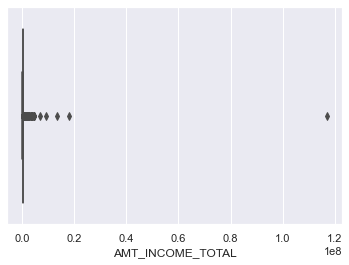

In [115]:
sns.boxplot(data = app_data, x='AMT_INCOME_TOTAL')
plt.show()

### There is one outlier with 9 digit salary

In [116]:
app_data[app_data['AMT_INCOME_TOTAL'] > 100000000]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
12840      114967       1         Cash loans           F            N   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
12840               Y             1       117000000.0    562491.0   

       AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
12840      26194.5         454500.0   Unaccompanied          Working   

                 NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
12840  Secondary / secondary special            Married  House / apartment   

       REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
12840                    0.010643      -12615           -922   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
12840            -6762.0            -3643          NaN           1   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
12840               1                0                 1           0   

       FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
12840           0        Laborers              3.0                     2   

       REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
12840                            2                    TUESDAY   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
12840                       14                           0   

       REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
12840                           0                            0   

       REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
12840                       0                       0   

       LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  \
12840                        0  Business Entity Type 3      0.460809   

       EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
12840      0.113161      0.145543                       0.0   

       DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
12840                       0.0                       0.0   

       DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  \
12840                       0.0                     0.0                0   

       FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
12840                1                0                0                0   

       FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  \
12840                0                0                0                 0   

       FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
12840                 0                 0                 0                 0   

       FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  \
12840                 0                 0                 0                 0   

       FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
12840                 0                 0                 0   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
12840                         0.0                        0.0   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
12840                         0.0                        0.0   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
12840                        0.0                         1.0

### A loaborer having a 9 digit salary is not logically possible, so we can remove this row

In [117]:
# Expected Length of data frame after removing Outlier

len(app_data[app_data['AMT_INCOME_TOTAL'] <= 100000000])

307510

In [118]:
# Length of data frame before removing Outlier

len(app_data)

307511

In [119]:
app_data = app_data[app_data['AMT_INCOME_TOTAL'] <= 100000000]

In [120]:
# Length of data frame before removing Outlier

len(app_data)

307510

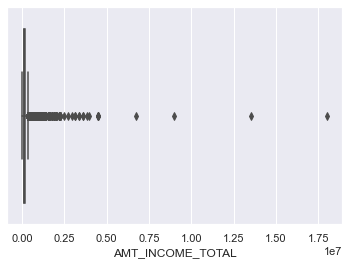

In [121]:
sns.boxplot(data = app_data, x='AMT_INCOME_TOTAL')
plt.show()

In [122]:
app_data[app_data['AMT_INCOME_TOTAL'] > 5000000]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
77768       190160       0         Cash loans           F            Y   
131127      252084       0         Cash loans           M            Y   
203693      336147       0         Cash loans           M            Y   
246858      385674       0         Cash loans           M            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
77768                N             0         9000000.0   1431531.0   
131127               N             0         6750000.0    790830.0   
203693               Y             2        18000090.0    675000.0   
246858               Y             0        13500000.0   1400503.5   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
77768      132601.5        1377000.0   Unaccompanied               Working   
131127      52978.5         675000.0   Unaccompanied               Working   
203693      69295.5         675000.0   Unaccompanied  Commercial associate   
246858     130945.5        1368000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
77768                Higher education     Civil marriage  House / apartment   
131127               Higher education            Married  House / apartment   
203693  Secondary / secondary special            Married  House / apartment   
246858               Higher education            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
77768                     0.010147      -16425          -8476   
131127                    0.009549      -19341           -443   
203693                    0.030755      -15704          -4961   
246858                    0.030755      -13551           -280   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
77768             -7276.0            -1656          8.0           1   
131127            -7414.0            -2886          8.0           1   
203693            -3338.0            -4728          7.0           1   
246858            -3953.0            -4972         10.0           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
77768                1                0                 1           0   
131127               1                1                 1           1   
203693               1                0                 1           0   
246858               1                1                 1           0   

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
77768            0        Managers              2.0                     2   
131127           0        Laborers              2.0                     2   
203693           0        Laborers              4.0                     2   
246858           0        Laborers              2.0                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
77768                             2                     FRIDAY   
131127                            2                    TUESDAY   
203693                            2                   THURSDAY   
246858                            2                     SUNDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
77768                        13                           0   
131127                       14                           0   
203693                       22                           0   
246858                       12                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
77768                            0                            0   
131127                           1                            1   
203693                           0                            0   
246858                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
77768                   

- __Note__: Removed one outlier.  We don't have sufficient data to confirm remaining 4 rows has got outliers in AMT_INCOME_TOTAL column.  Hence leaving those as is.

- ###  4.9: Analysing AMT_INCOME_TOTAL Analysis

In [123]:
app_data['AMT_CREDIT'].describe()

count    3.075100e+05
mean     5.990261e+05
std      4.024914e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

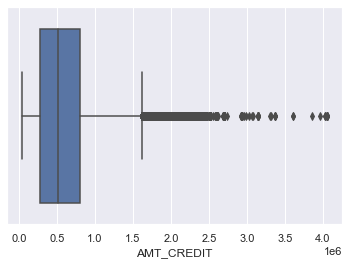

In [124]:
sns.boxplot(data = app_data, x='AMT_CREDIT')
plt.show()

- __Note__: Clean data and without any issues.  Data beyond the maximum values are not outliers here

- ###  4.10: Analysing AMT_ANNUITY Analysis

In [125]:
app_data['AMT_ANNUITY'].describe()

count    307498.000000
mean      27108.576882
std       14493.760789
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

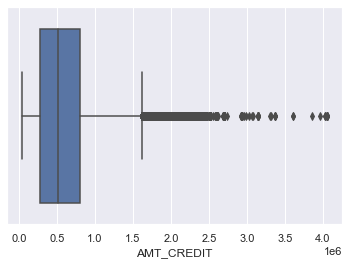

In [126]:
sns.boxplot(data = app_data, x='AMT_CREDIT')
plt.show()

- __Note__: Clean data and without any issues.  Data beyond the maximum values are not outliers here

- ###  4.11: Analysing NAME_TYPE_SUITE Analysis

In [127]:
app_data['NAME_TYPE_SUITE'].value_counts(normalize=True)

Unaccompanied      0.812387
Family             0.130562
Spouse, partner    0.036974
Children           0.010624
Other_B            0.005756
Other_A            0.002816
Group of people    0.000881
Name: NAME_TYPE_SUITE, dtype: float64

- __Note__: 81% customers has come alone to the bank while applying for a loan

- ###  4.12: Analysing NAME_INCOME_TYPE Analysis

In [128]:
app_data['NAME_INCOME_TYPE'].value_counts(normalize=True)

Working                 0.516318
Commercial associate    0.232893
Pensioner               0.180033
State servant           0.070577
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: NAME_INCOME_TYPE, dtype: float64

- __Note__: Clean data and without any issues

- ###  4.13: Analysing NAME_EDUCATION_TYPE Analysis

In [129]:
app_data['NAME_EDUCATION_TYPE'].value_counts(normalize=True)

Secondary / secondary special    0.710188
Higher education                 0.243449
Incomplete higher                0.033420
Lower secondary                  0.012409
Academic degree                  0.000533
Name: NAME_EDUCATION_TYPE, dtype: float64

- __Note__: 71% customers has completed only upto Secondary / Secondary special education only

- ###  4.14: Analysing NAME_FAMILY_STATUS Analysis

In [130]:
app_data['NAME_FAMILY_STATUS'].value_counts(normalize=True)

Married                 0.638779
Single / not married    0.147781
Civil marriage          0.096826
Separated               0.064291
Widow                   0.052317
Unknown                 0.000007
Name: NAME_FAMILY_STATUS, dtype: float64

- __Note__: Married and Civil marriage are one and the same so we are going to merge them into one (Married)

In [131]:
# Replacing "Civil Marriage" with "Married"

app_data.loc[app_data['NAME_FAMILY_STATUS'] == 'Civil marriage','NAME_FAMILY_STATUS'] = 'Married'

In [132]:
app_data['NAME_FAMILY_STATUS'].value_counts(normalize=True)

Married                 0.735605
Single / not married    0.147781
Separated               0.064291
Widow                   0.052317
Unknown                 0.000007
Name: NAME_FAMILY_STATUS, dtype: float64

- __Note__: 73% Married are applying for a Loan

- ###  4.15: Analysing NAME_HOUSING_TYPE Analysis

In [133]:
app_data['NAME_HOUSING_TYPE'].value_counts(normalize=True)

House / apartment      0.887344
With parents           0.048259
Municipal apartment    0.036366
Rented apartment       0.015873
Office apartment       0.008510
Co-op apartment        0.003649
Name: NAME_HOUSING_TYPE, dtype: float64

- __Note__: 88% of applicants live in "House / apartment"

- ###  4.16: Analysing REGION_POPULATION_RELATIVE Analysis

In [134]:
app_data['REGION_POPULATION_RELATIVE'].describe()

count    307510.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

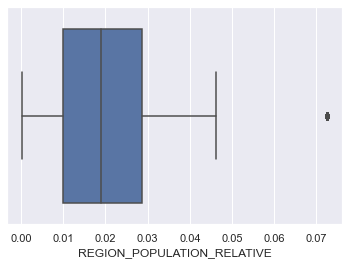

In [135]:
sns.boxplot(data = app_data, x='REGION_POPULATION_RELATIVE')
plt.show()

In [136]:
app_data[app_data['REGION_POPULATION_RELATIVE'] > 0.07].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
65       100077       0         Cash loans           M            N   
86       100101       0         Cash loans           F            Y   
105      100124       0         Cash loans           M            N   
111      100131       0         Cash loans           F            N   
188      100218       0         Cash loans           M            Y   

    FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
65                Y             0          180000.0   1256400.0      40657.5   
86                Y             0          202500.0    343377.0      22072.5   
105               Y             0          225000.0    448272.0      28647.0   
111               Y             0          270000.0    891072.0      45625.5   
188               Y             0          337500.0    876078.0      49050.0   

     AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
65          900000.0   Unaccompanied  Commercial associate   
86          283500.0   Unaccompanied         State servant   
105         396000.0   Unaccompanied             Pensioner   
111         720000.0   Unaccompanied  Commercial associate   
188         765000.0   Unaccompanied  Commercial associate   

               NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
65   Secondary / secondary special  Single / not married  House / apartment   
86                Higher education  Single / not married  House / apartment   
105  Secondary / secondary special                 Widow  House / apartment   
111  Secondary / secondary special  Single / not married  House / apartment   
188               Higher education  Single / not married  House / apartment   

     REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
65                     0.072508      -12049           -579            -6105.0   
86                     0.072508      -18138           -969            -7421.0   
105                    0.072508      -24051         365243            -7040.0   
111                    0.072508      -13830          -1169            -7953.0   
188                    0.072508      -13210           -225            -7318.0   

     DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  \
65                -1          NaN           1               1   
86             -1681          5.0           1               1   
105            -4053          NaN           1               0   
111            -4802          NaN           1               1   
188            -4397          3.0           1               1   

     FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
65                 0                 1           0           0   
86                 0                 1           0           0   
105                0                 1           1           1   
111                0                 1           0           0   
188                0                 1           0           0   

           OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
65              Core staff              1.0                     1   
86   High skill tech staff              1.0                     1   
105                    NaN              1.0                     1   
111          Realty agents              1.0                     1   
188                Drivers              1.0                     1   

     REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
65                             1                  WEDNESDAY   
86                             1                  WEDNESDAY   
105                            1                  WEDNESDAY   
111                            1                   THURSDAY   
188                            1                   SATURDAY   

     HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
65                        12                           0   
86                        13                           0   


- __Note__: Clean data and without any issues

- ###  4.17: Analysing DAYS_BIRTH Analysis

In [137]:
app_data['DAYS_BIRTH'].describe()

count    307510.000000
mean     -16037.006195
std        4363.991364
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

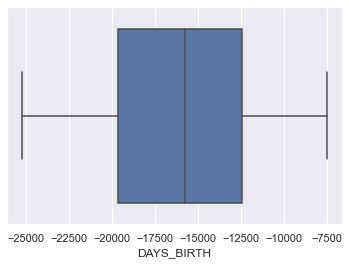

In [138]:
sns.boxplot(data = app_data, x='DAYS_BIRTH')
plt.show()

###  Creating new column "AGE" to app_data data frame

In [139]:
app_data['AGE'] = abs(app_data['DAYS_BIRTH'])/365

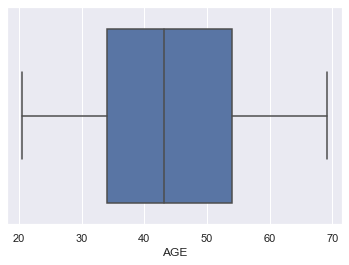

In [140]:
sns.boxplot(data = app_data, x='AGE')
plt.show()

- __Note__: Applicant's between age range 20 years and 69 years have applied for loan and there are not outliers.  And the interquartile range falls between 35 and 55 years

- ###  4.18: Analysing DAYS_EMPLOYED Analysis

In [141]:
app_data['DAYS_EMPLOYED'].describe()

count    307510.000000
mean      63815.256424
std      141275.947995
min      -17912.000000
25%       -2760.000000
50%       -1213.500000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [142]:
app_data[app_data['DAYS_EMPLOYED'] == 365243]['NAME_INCOME_TYPE'].value_counts(normalize=True)

Pensioner     0.999603
Unemployed    0.000397
Name: NAME_INCOME_TYPE, dtype: float64

In [143]:
app_data[app_data['DAYS_EMPLOYED'] == 365243]['NAME_INCOME_TYPE'].value_counts()

Pensioner     55352
Unemployed       22
Name: NAME_INCOME_TYPE, dtype: int64

- __Note__: All customers who are either Pensioners or Unemployed has DAYS_EMPLOYED as 365243 (1000 years) which is similar to NULL

In [144]:
app_data[app_data['NAME_INCOME_TYPE'] == 'Unemployed']['DAYS_EMPLOYED'].describe()

count        22.0
mean     365243.0
std           0.0
min      365243.0
25%      365243.0
50%      365243.0
75%      365243.0
max      365243.0
Name: DAYS_EMPLOYED, dtype: float64

- __Note__: All "Unemployed" customers has DAYS_EMPLOYED as 365243 (1000 years) which is similar to NULL

In [145]:
# Replacing DAYS_EMPLOYED column with NULLs for 365243

app_data.loc[app_data['DAYS_EMPLOYED'] == 365243, 'DAYS_EMPLOYED'] = np.nan


In [146]:
app_data['DAYS_EMPLOYED'].isnull().sum()

55374

In [147]:
app_data['DAYS_EMPLOYED'].describe()

count    252136.000000
mean      -2384.175124
std        2338.362986
min      -17912.000000
25%       -3175.000000
50%       -1648.000000
75%        -767.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

- ###  4.19: Analysing DAYS_REGISTRATION Analysis

In [148]:
app_data['DAYS_REGISTRATION'].isnull().sum()

0

In [149]:
app_data['DAYS_REGISTRATION'].describe()

count    307510.000000
mean      -4986.114553
std        3522.890593
min      -24672.000000
25%       -7479.750000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

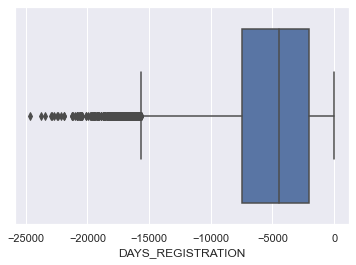

In [150]:
sns.boxplot(data = app_data, x='DAYS_REGISTRATION')
plt.show()

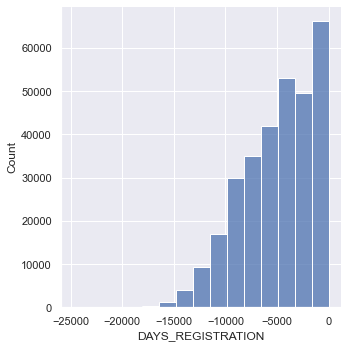

In [151]:
sns.displot(data = app_data, x = 'DAYS_REGISTRATION', bins = 15)
plt.show()

- __Note__: Tt is evident that most of the people who are applying for a Loan has changed their registration recently

- ###  4.20: Analysing DAYS_ID_PUBLISH Analysis

In [152]:
app_data['DAYS_ID_PUBLISH'].describe()

count    307510.000000
mean      -2994.200263
std        1509.452420
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

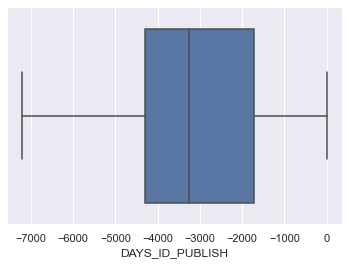

In [153]:
sns.boxplot(data = app_data, x='DAYS_ID_PUBLISH')
plt.show()

- __Note__: Clean data and without any issues

- ###  4.21: Analysing OWN_CAR_AGE Analysis

In [154]:
app_data['OWN_CAR_AGE'].describe()

count    104582.000000
mean         12.061091
std          11.944812
min           0.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          91.000000
Name: OWN_CAR_AGE, dtype: float64

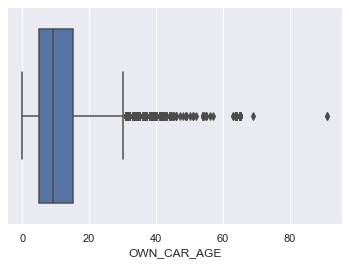

In [155]:
sns.boxplot(data = app_data, x='OWN_CAR_AGE')
plt.show()

In [156]:
len(app_data[app_data['OWN_CAR_AGE'] > 60])

3339

- __Note__: 
    - Avg. life of cars in India is 15 years, which is matching with 75% percentile value of given data
    - There were 3339 customers with cars 60 year or older, which are outliers

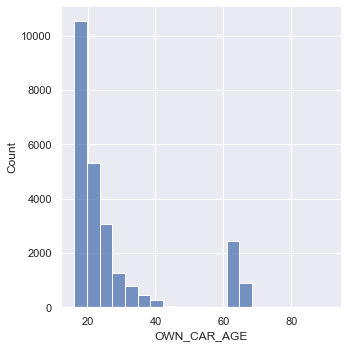

In [157]:
sns.displot(data = app_data[app_data['OWN_CAR_AGE'] > 15], x = 'OWN_CAR_AGE', bins = 20)
plt.show()

- ###  4.22: Analysing OCCUPATION_TYPE Analysis

In [158]:
app_data['OCCUPATION_TYPE'].value_counts()

Laborers                 96197
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

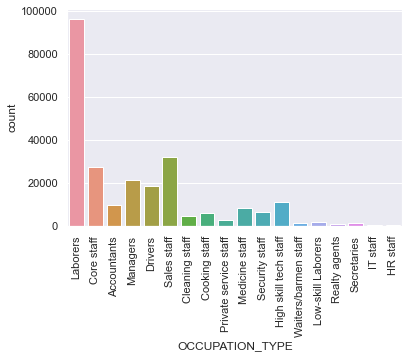

In [159]:
ocp_type = sns.countplot(data = app_data, x = 'OCCUPATION_TYPE')
ocp_type.set_xticklabels(ocp_type.get_xticklabels(), rotation=90)

plt.show()

- ###  4.23: Analysing CNT_FAM_MEMBERS Analysis

In [160]:
app_data['CNT_FAM_MEMBERS'].describe()

count    307508.000000
mean          2.152663
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

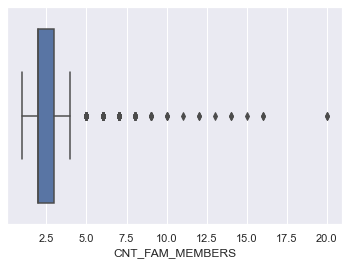

In [161]:
sns.boxplot(data = app_data, x='CNT_FAM_MEMBERS')
plt.show()

In [162]:
app_data[app_data['CNT_FAM_MEMBERS'] > 10][['NAME_FAMILY_STATUS','CNT_FAM_MEMBERS','CNT_CHILDREN']]

NAME_FAMILY_STATUS  CNT_FAM_MEMBERS  CNT_CHILDREN
34545                Married             13.0            11
80948                Married             14.0            12
132585               Married             12.0            10
155369  Single / not married             20.0            19
171125               Married             14.0            12
176011             Separated             15.0            14
183878               Married             16.0            14
186820               Married             12.0            10
265784  Single / not married             20.0            19
267998               Married             16.0            14
276768               Married             11.0             9

- __Note__: There are clearly some outliers in the data, but these are valid data as they have many children that results in more no. of family members

- ###  4.24: Analysing REGION_RATING_CLIENT Analysis

In [163]:
app_data['REGION_RATING_CLIENT'].value_counts(normalize=True)

2    0.738132
3    0.157166
1    0.104702
Name: REGION_RATING_CLIENT, dtype: float64

- __Note__: 73.8% of Loan applicants lives in Tier 2 Region

- ###  4.25: Analysing REGION_RATING_CLIENT_W_CITY Analysis

In [164]:
app_data['REGION_RATING_CLIENT_W_CITY'].value_counts(normalize=True)

2    0.746262
3    0.142630
1    0.111109
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64

- __Note__: 74.6% of Loan applicants lives in Tier 2 Region

- ###  4.26: Analysing WEEKDAY_APPR_PROCESS_START Analysis

In [165]:
app_data['WEEKDAY_APPR_PROCESS_START'].value_counts(normalize=True)

TUESDAY      0.175279
WEDNESDAY    0.168886
MONDAY       0.164918
THURSDAY     0.164518
FRIDAY       0.163695
SATURDAY     0.110084
SUNDAY       0.052619
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64

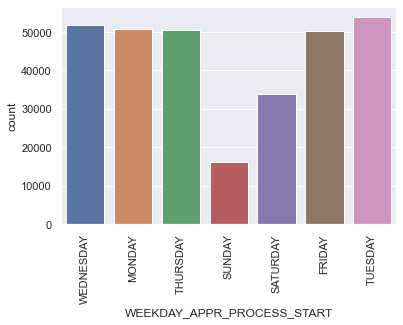

In [166]:
prcs_start = sns.countplot(data = app_data, x = 'WEEKDAY_APPR_PROCESS_START')
prcs_start.set_xticklabels(prcs_start.get_xticklabels(), rotation=90)

plt.show()

- __Note__: There are almost same no. of applications got submitted throught out the week

- ###  4.27: Analysing HOUR_APPR_PROCESS_START Analysis

In [167]:
app_data['HOUR_APPR_PROCESS_START'].value_counts(normalize=True)

10    0.122669
11    0.121066
12    0.111323
13    0.100676
14    0.090017
9     0.089051
15    0.080775
16    0.066291
8     0.049192
17    0.048454
7     0.029693
18    0.029427
6     0.018998
19    0.012513
5     0.011831
4     0.006797
3     0.004000
20    0.003889
21    0.001317
2     0.000992
22    0.000488
1     0.000280
23    0.000133
0     0.000130
Name: HOUR_APPR_PROCESS_START, dtype: float64

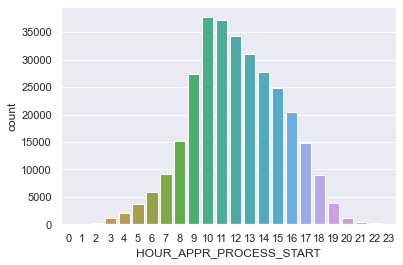

In [168]:
sns.countplot(data = app_data, x = 'HOUR_APPR_PROCESS_START')
plt.show()

- __Note__: More applications were submitted during Peak office hours between 10 A.M and 4 P.M.

- ###  4.28: Analysing ORGANIZATION_TYPE Analysis

In [169]:
app_data['ORGANIZATION_TYPE'].value_counts(normalize=True)

Business Entity Type 3    0.269660
Self-employed             0.152346
Other                     0.066167
Medicine                  0.044393
Business Entity Type 2    0.041854
Government                0.041263
School                    0.035271
Trade: type 7             0.031059
Kindergarten              0.027287
Construction              0.026656
Business Entity Type 1    0.023733
Transport: type 4         0.021409
Trade: type 3             0.013850
Industry: type 9          0.013358
Industry: type 3          0.013001
Security                  0.012878
Housing                   0.011732
Industry: type 11         0.010724
Military                  0.010447
Bank                      0.009943
Agriculture               0.009733
Police                    0.009285
Transport: type 2         0.008741
Postal                    0.008555
Security Ministries       0.007829
Trade: type 2             0.007536
Restaurant                0.007183
Services                  0.006247
University          

###  Step 5: Bi/Multi variate Analysis

Analysing individual columns against TARGET variable

- ###  5.1: Preparing for Bi / Multi variate Analysis

In [170]:
# Check in Imbalance

# Ratio  for imbalance

(app_data['TARGET']==0).sum() / (app_data['TARGET']==1).sum()

11.387608765710603

- __Note__: Since there is 11% imbalance in data, let's create two data frames, customers with Payment difficulties and another one for customers without payment difficulties

In [171]:
# Since there is a lot of imbalance, lets separate out these

NO_PAY_DIFF = app_data.loc[app_data['TARGET'] == 0]
WITH_PAY_DIFF = app_data.loc[app_data['TARGET'] == 1]

- ###  5.2: Function for Plotting Categorical columns against Target variable

In [172]:
def cat_plotting(app_data, data_no_diff, data_with_diff, column):
    
    fig = plt.figure(figsize=(14,12))
    
    ax1 = plt.subplot(221)
    app_data[column].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title(column + "\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
    
    ax2 = plt.subplot(222)
    sns.countplot(x= column, hue = 'TARGET', data = app_data, ax = ax2)
    plt.xticks(rotation=90)
    plt.title(column + ' Vs Target - total count\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})


    ax3 = plt.subplot(223)
    df = pd.DataFrame()
    df['0']= ((data_no_diff[column].value_counts())/len(data_no_diff))
    df['1']= ((data_with_diff[column].value_counts())/len(data_with_diff))
    df.plot.bar(ax=ax3)
    ax3.set_xlabel(column)
    ax3.set_ylabel('% of Total')
    plt.title(column + ' Vs Target - %\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})


    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()

- ###  5.3: Creating a new Data series which holds Categorical column names

In [173]:
categorical_columns = app_data.select_dtypes(include=['object']).columns

In [174]:
categorical_columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

- ###  5.4: Bivariate Analysis - Categorical columns

Plotting  NAME_CONTRACT_TYPE


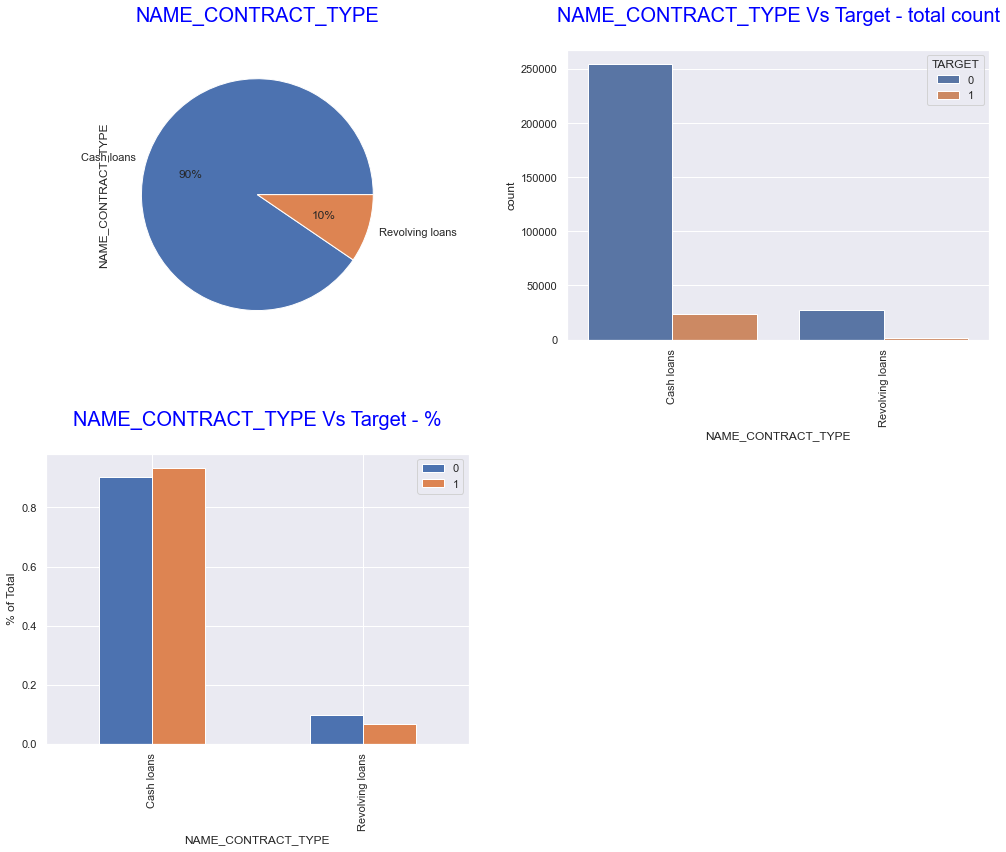

Plotting  CODE_GENDER


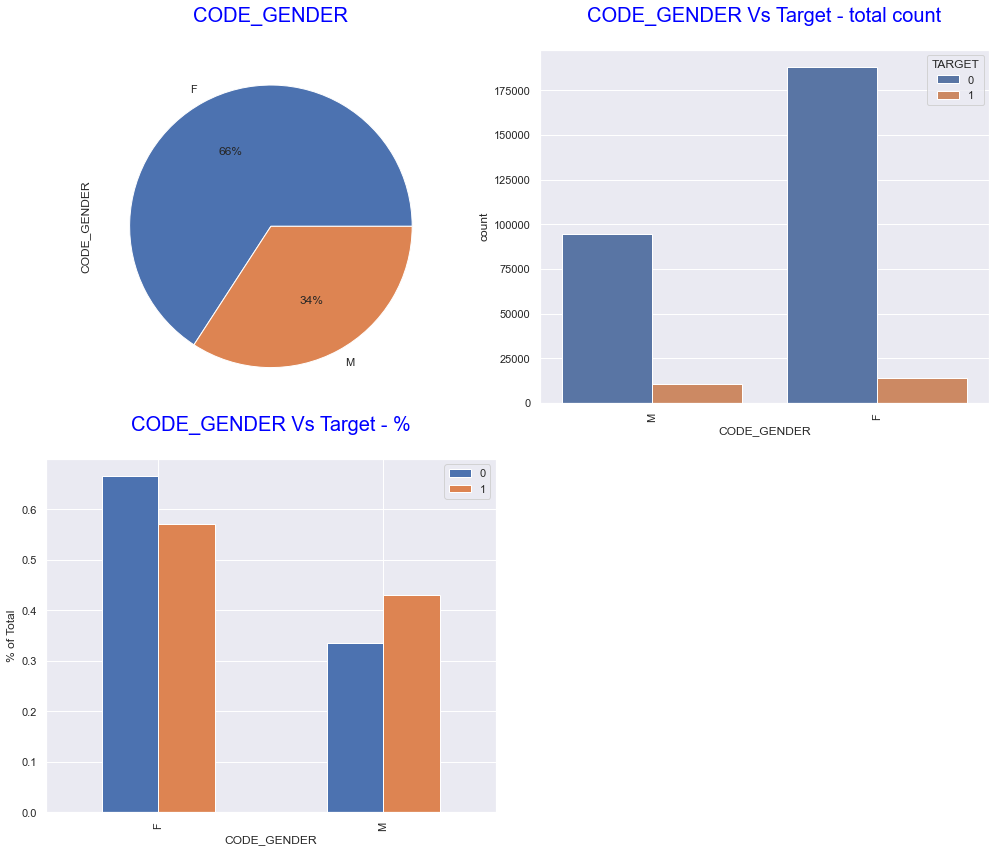

Plotting  FLAG_OWN_CAR


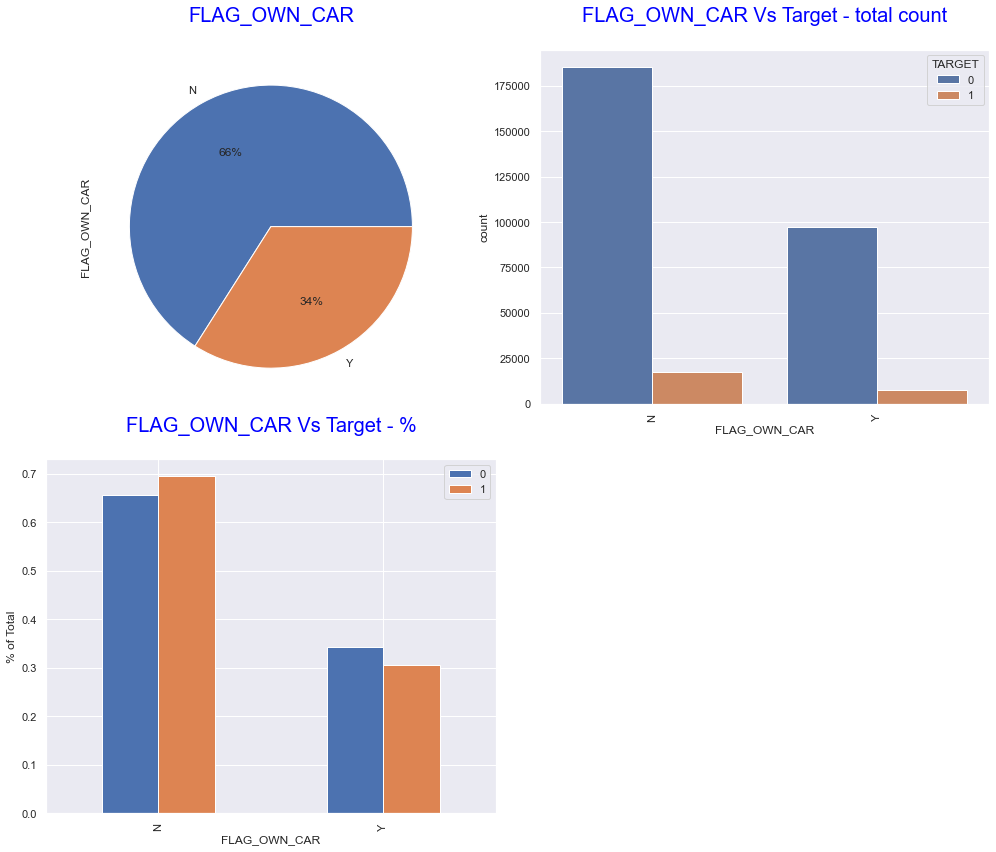

Plotting  FLAG_OWN_REALTY


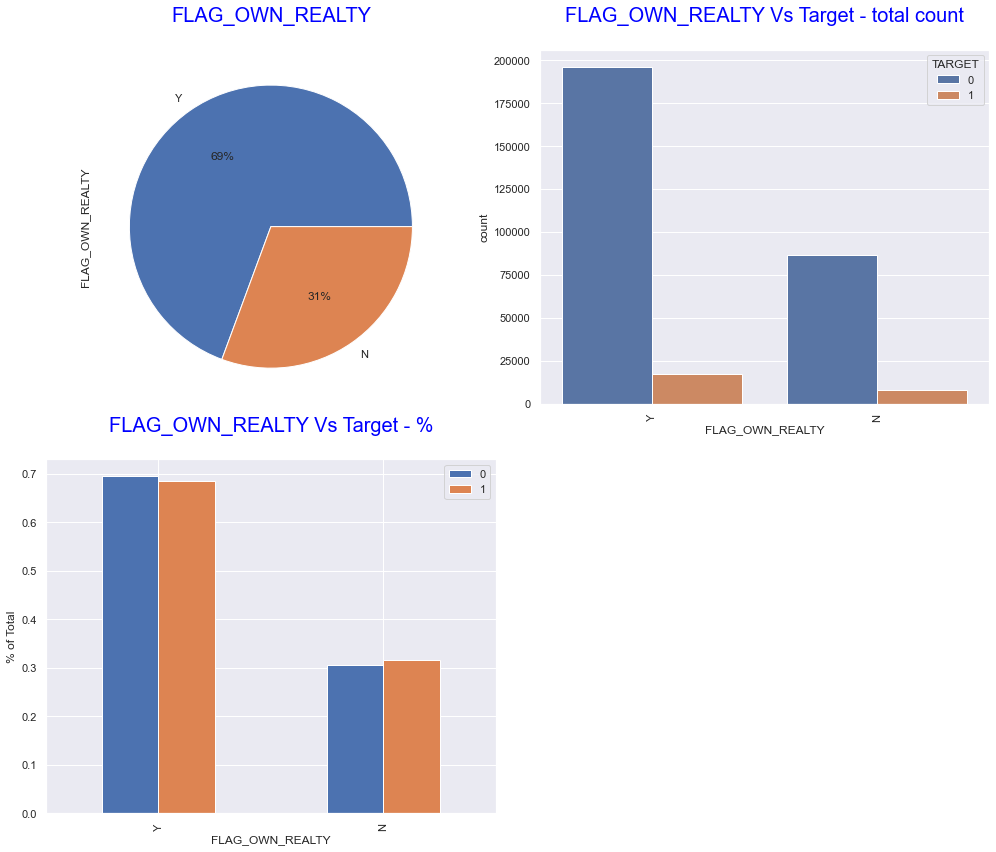

Plotting  NAME_TYPE_SUITE


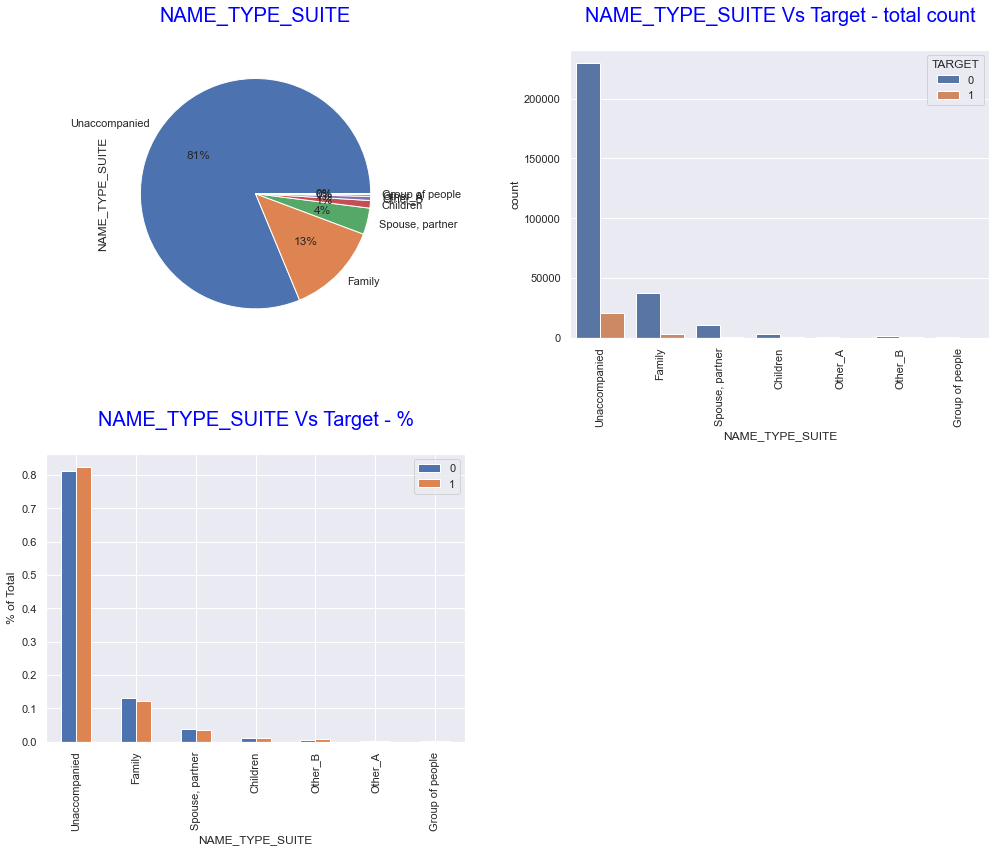

Plotting  NAME_INCOME_TYPE


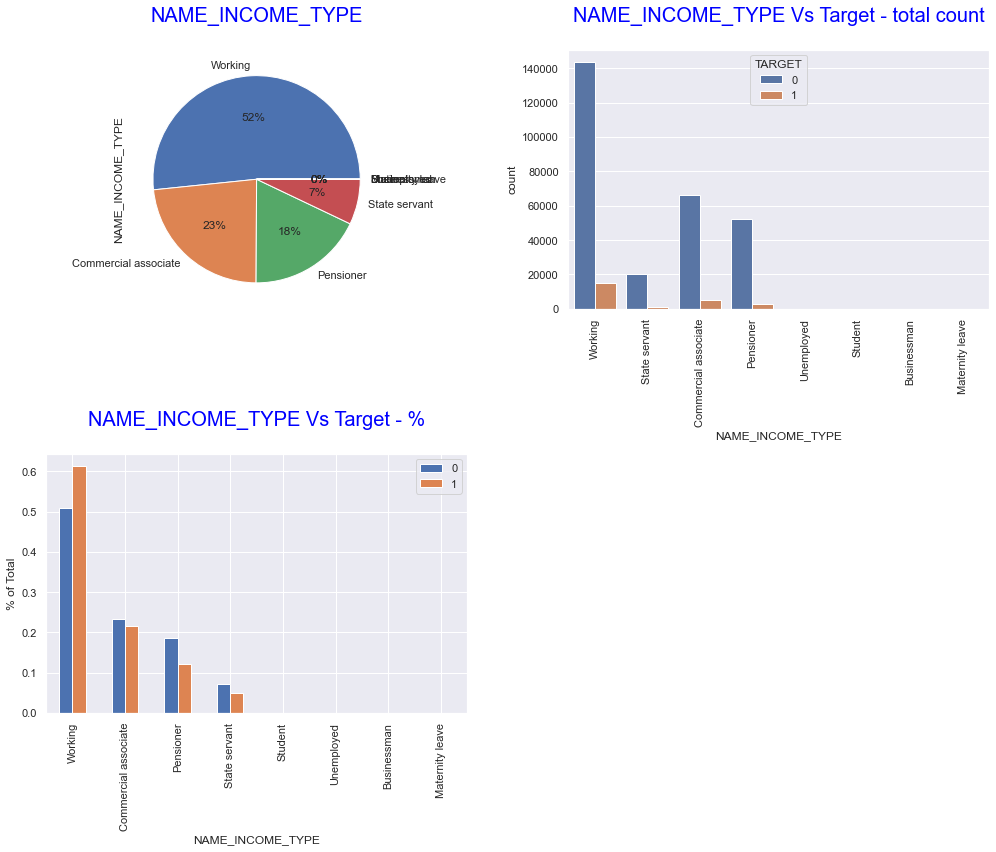

Plotting  NAME_EDUCATION_TYPE


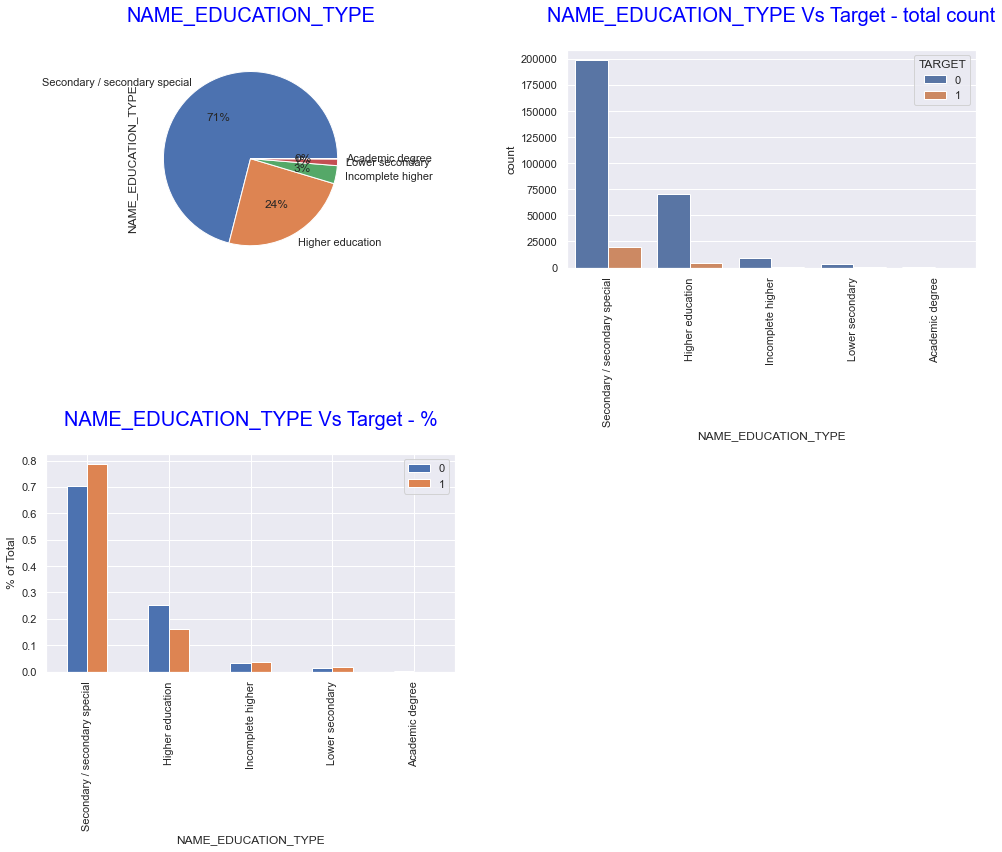

Plotting  NAME_FAMILY_STATUS


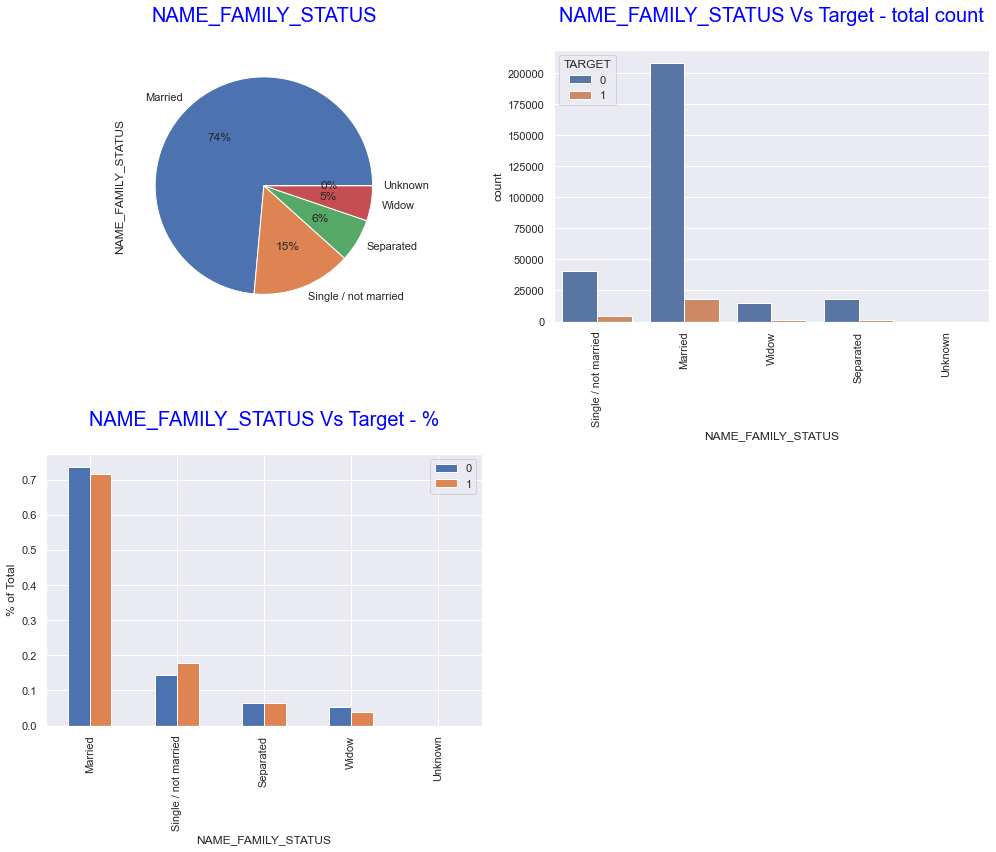

Plotting  NAME_HOUSING_TYPE


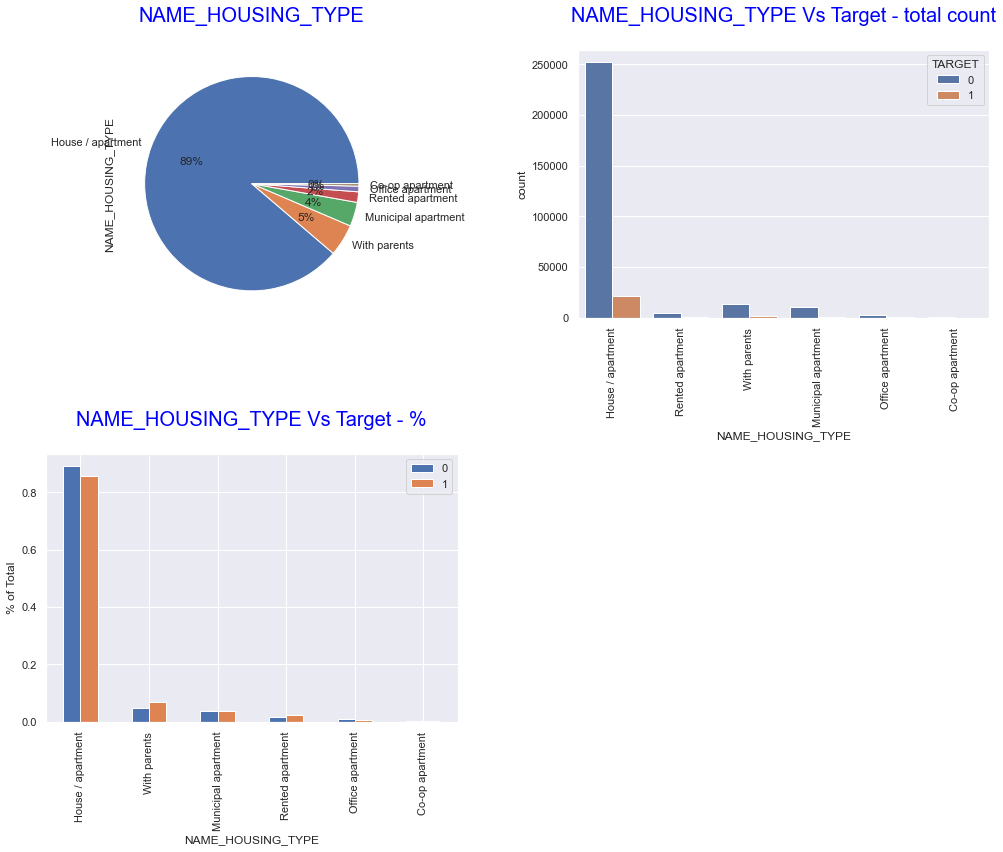

Plotting  OCCUPATION_TYPE


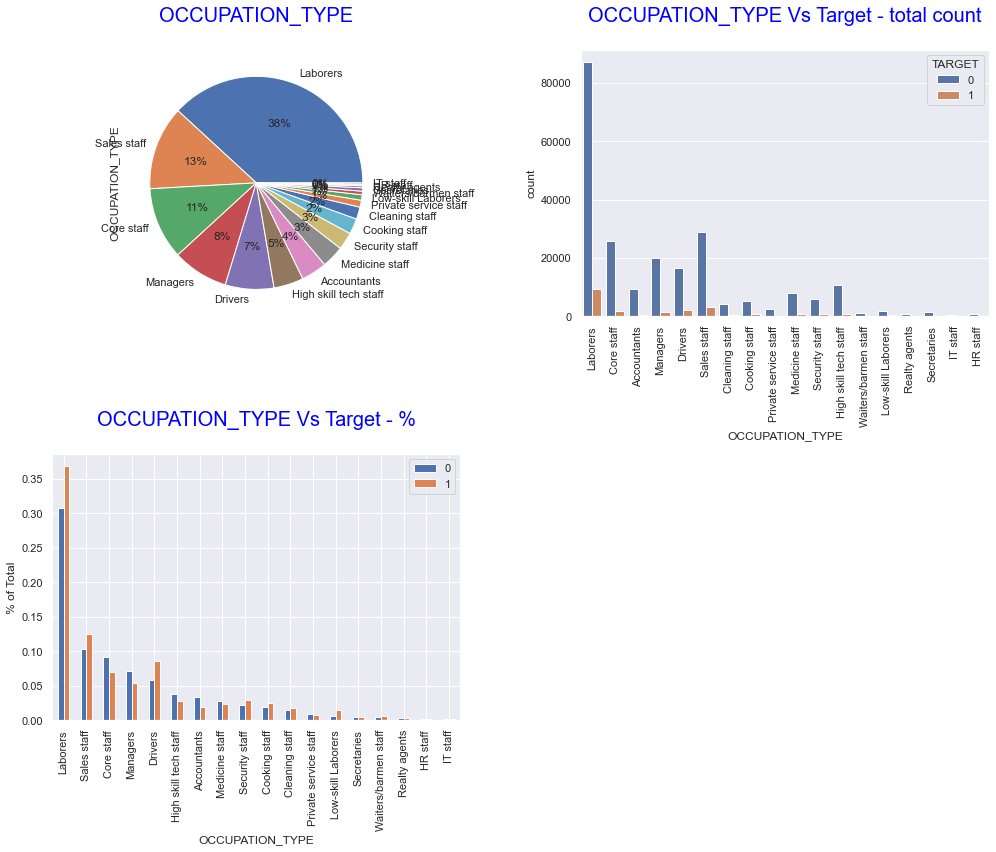

Plotting  WEEKDAY_APPR_PROCESS_START


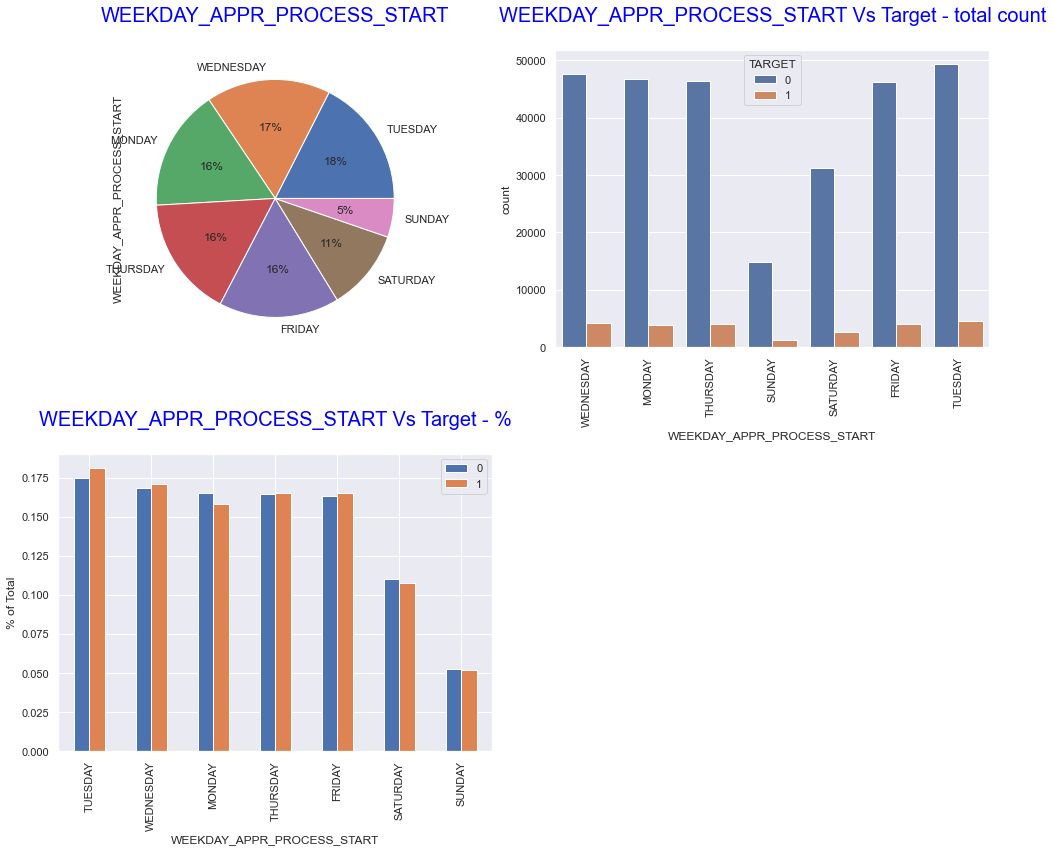

Plotting  ORGANIZATION_TYPE


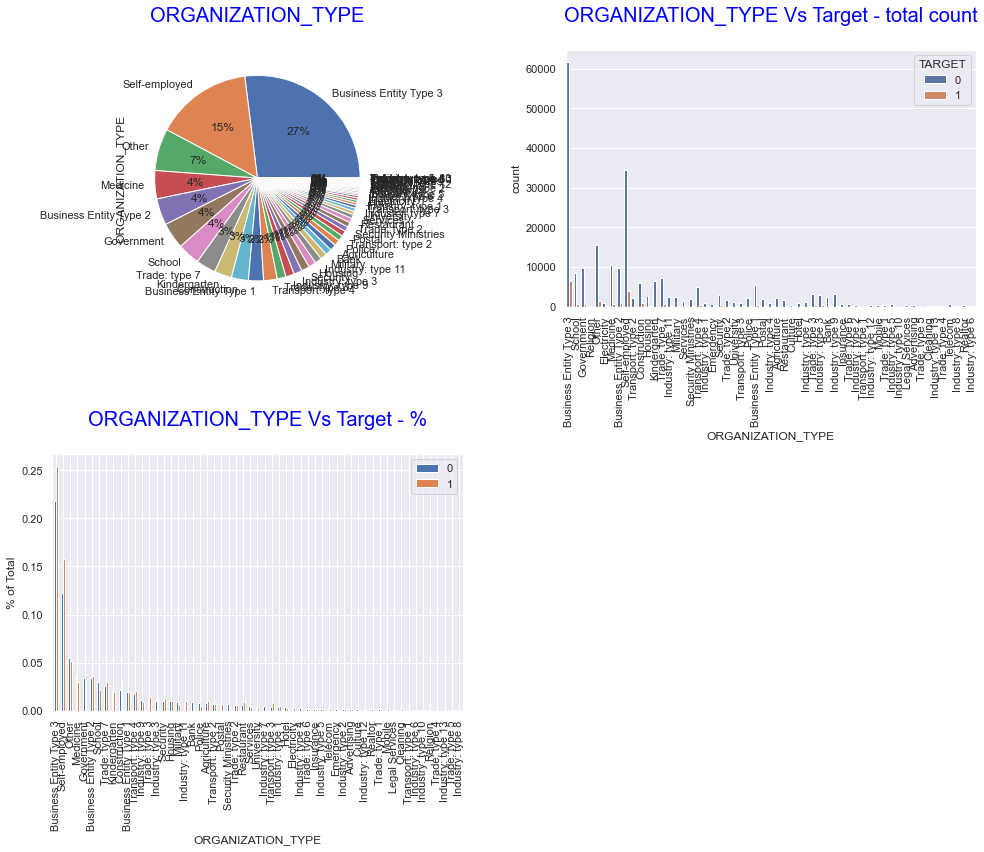

In [175]:
for column in categorical_columns:
    print("Plotting ", column)
    cat_plotting(app_data, NO_PAY_DIFF, WITH_PAY_DIFF, column)

- ###  5.4.1: Bivariate Analysis - Occupation_Type Vs Target

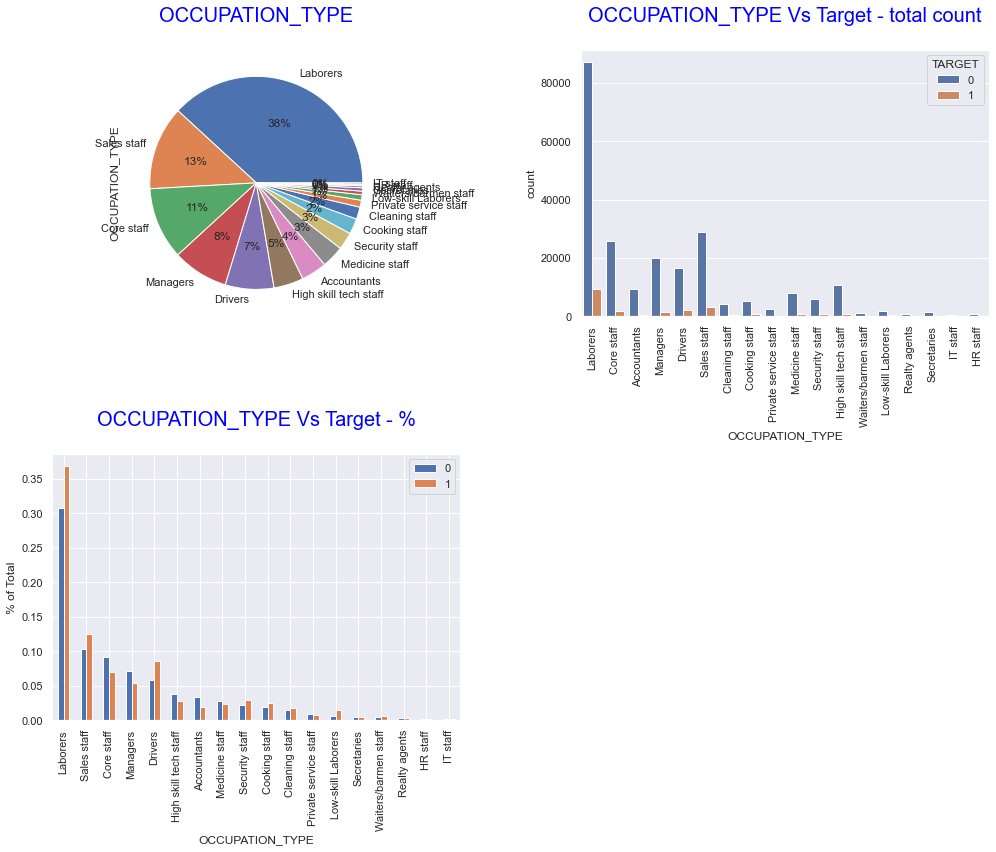

In [176]:
cat_plotting(app_data, NO_PAY_DIFF, WITH_PAY_DIFF, 'OCCUPATION_TYPE')

- __Insights__: 
    * Laborers, Sales staff, Drivers are among the top 5 borrowers and has more difficulties in repaying their loans. 
    * Other lower wage people, like Security Staff, Cooking Staff, Cleaning Staff, Low-Skill Laborers too have difficulties in repaying their loans

- ###  5.4.2: Bivariate Analysis - Family_Status Vs Target

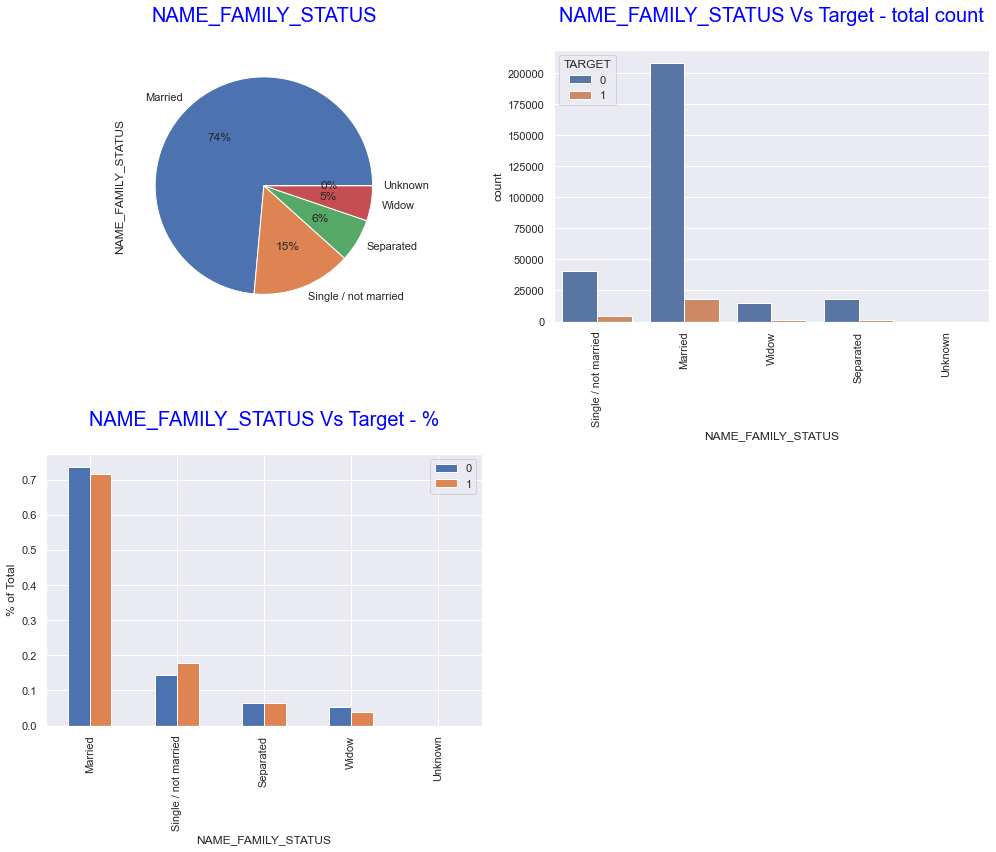

In [177]:

cat_plotting(app_data, NO_PAY_DIFF, WITH_PAY_DIFF, 'NAME_FAMILY_STATUS')

- __Insights__: 
    * 74% of the loan was applied by Married customers and they are very good in repaying them on time. 
    * Single/Not Married people are having trouble in repaying their loans on time.

- ###  5.4.3: Bivariate Analysis - Education_Type Vs Target 

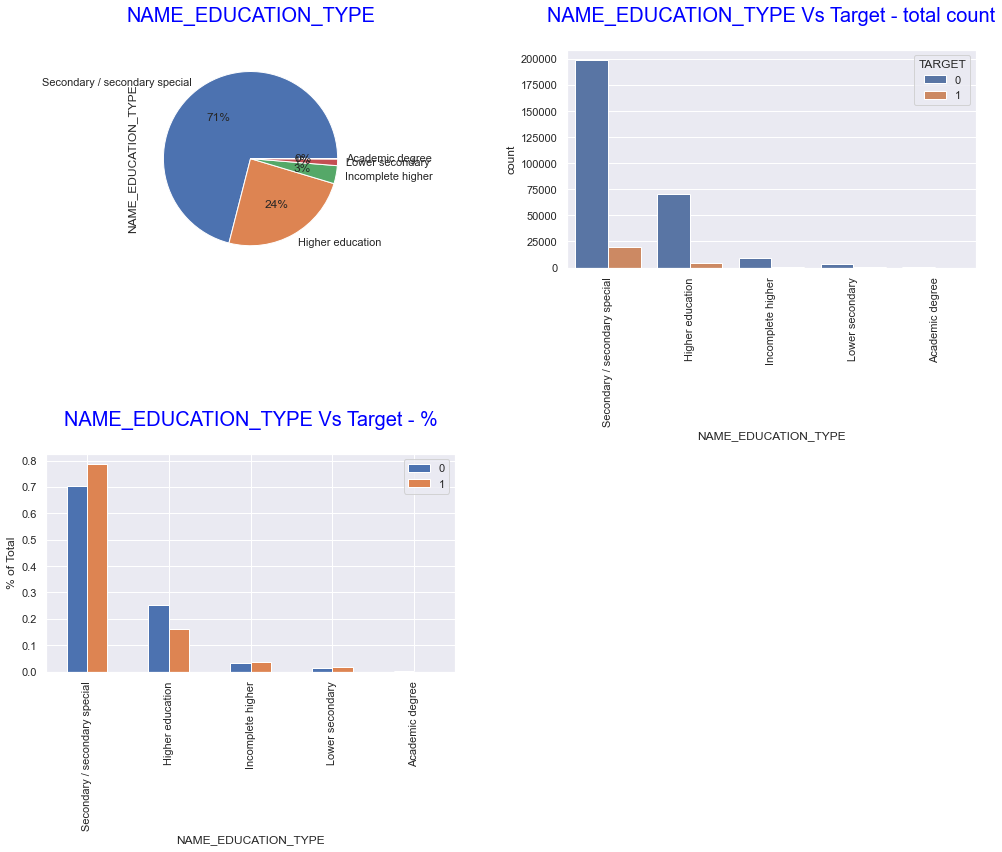

In [178]:
cat_plotting(app_data, NO_PAY_DIFF, WITH_PAY_DIFF, 'NAME_EDUCATION_TYPE')

- __Insights__: 
    * 71% of the loan was applied by who have finished just Secondary / Secondary Special education
    * These are the people having more difficulties in paying back their loans on time

- ###  5.4.4: Bivariate Analysis - Income_Type Vs Target 

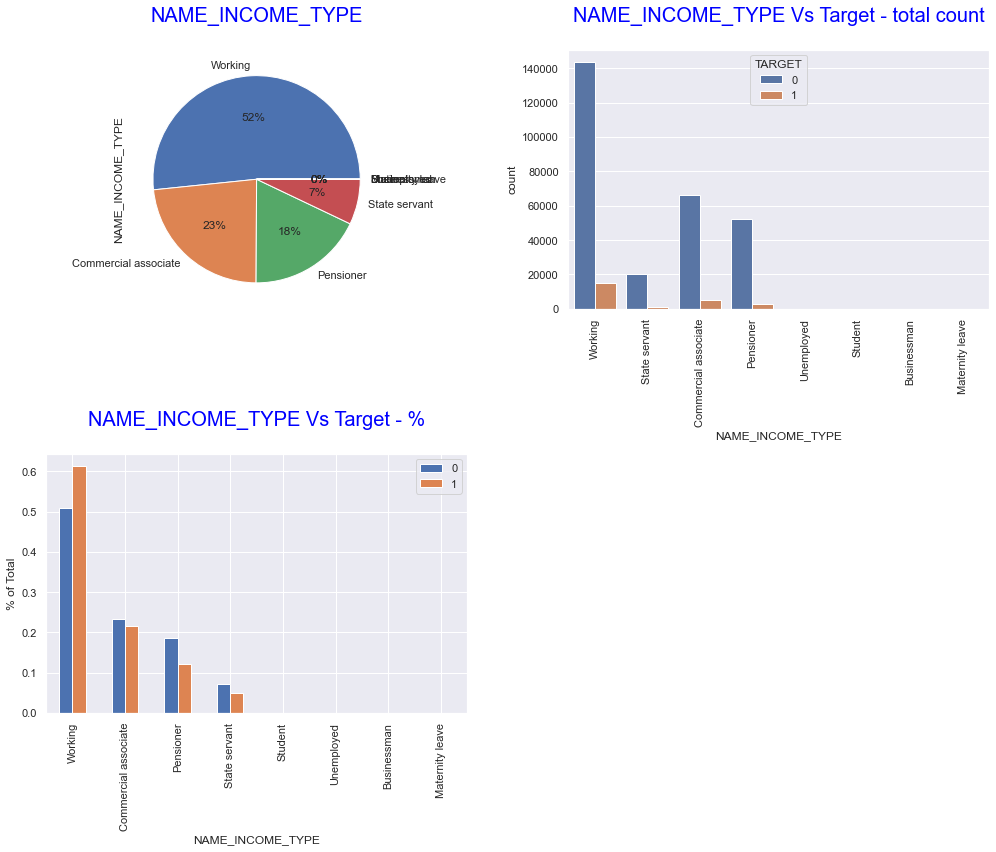

In [179]:
cat_plotting(app_data, NO_PAY_DIFF, WITH_PAY_DIFF, 'NAME_INCOME_TYPE')

- __Insights__:  
    * 52% of the loan was applied by Working class people
    * They are the ones having more difficulties in paying back their loans on time

- ###  5.4.5: Bivariate Analysis - Gender Vs Target 

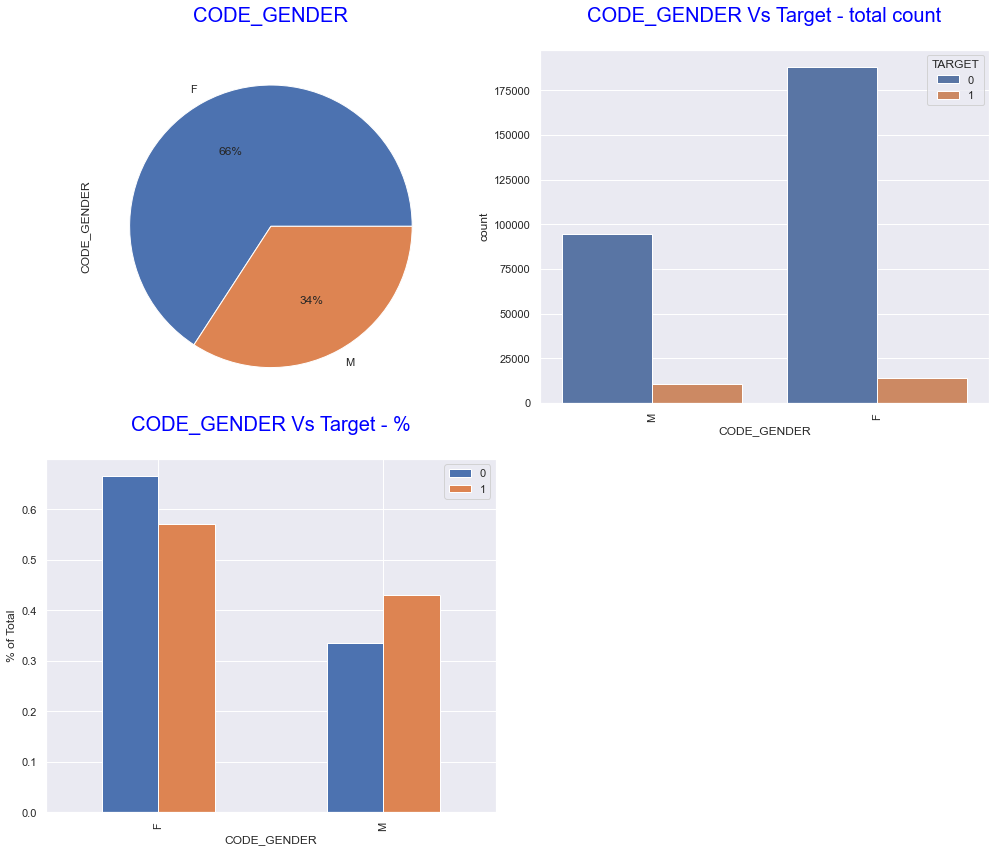

In [180]:
cat_plotting(app_data, NO_PAY_DIFF, WITH_PAY_DIFF, 'CODE_GENDER')

- __Insights__:  
    * 66% of the loan was applied by Female customers, where as Male applies only for 34%
    * Eventhough Female burrows more loan, they are very reliable for repaying them on time

- ###  5.5: Function for Plotting Numerical columns against Target variable

In [181]:
def num_plotting(app_data, column):
    
    fig = plt.figure(figsize=(14,12))
    
    ax1 = plt.subplot(221)
    sns.boxplot(data = app_data, x='TARGET', y=column, ax = ax1)

    plt.title(column + ' for Client\'s with Payment Difficulties', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})


    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()

- ###  5.6: Creating a new Data series which holds Numerical column names

In [182]:
numerical_columns = app_data.select_dtypes(include=['int64','float64']).columns
numerical_columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', '

- ###  5.7: Bivariate Analysis - Numerical columns

Plotting  SK_ID_CURR


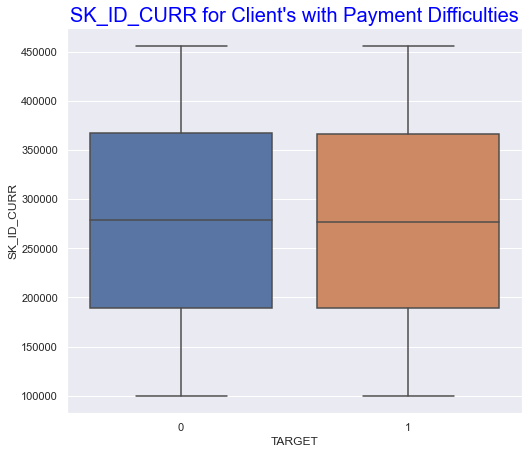

Plotting  TARGET


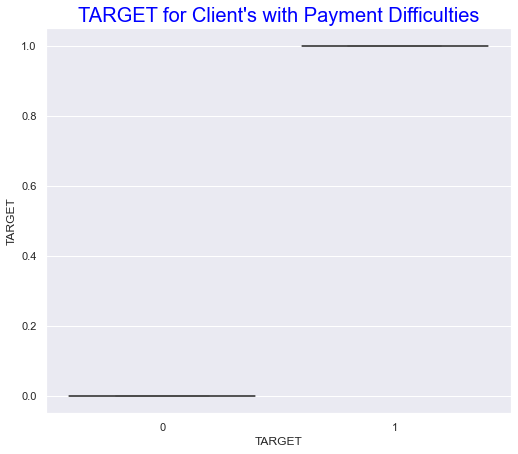

Plotting  CNT_CHILDREN


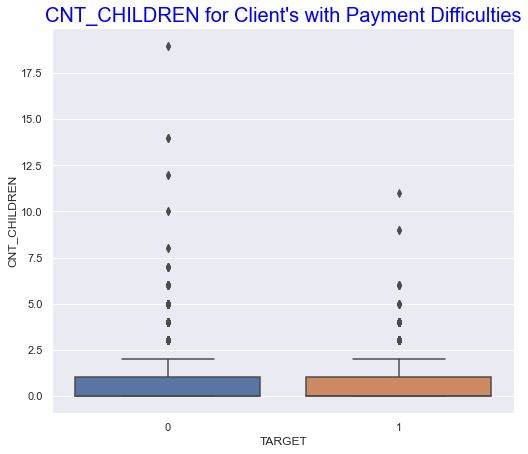

Plotting  AMT_INCOME_TOTAL


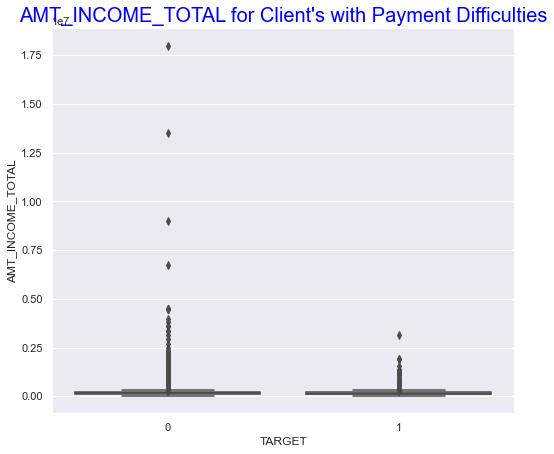

Plotting  AMT_CREDIT


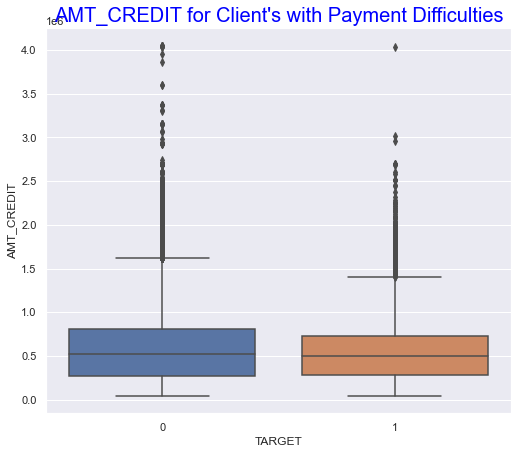

Plotting  AMT_ANNUITY


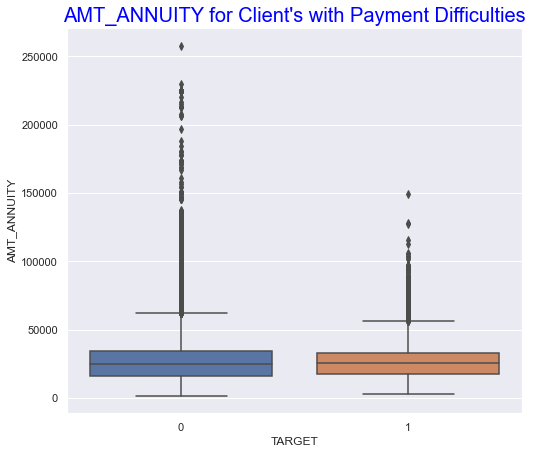

Plotting  AMT_GOODS_PRICE


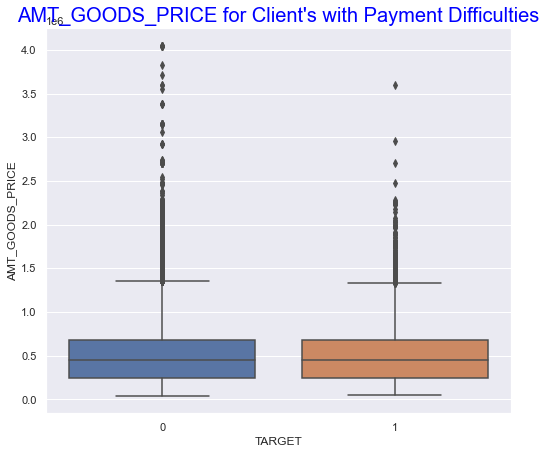

Plotting  REGION_POPULATION_RELATIVE


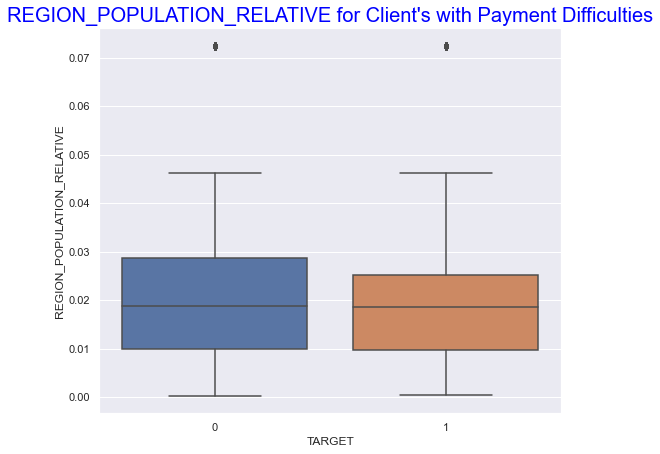

Plotting  DAYS_BIRTH


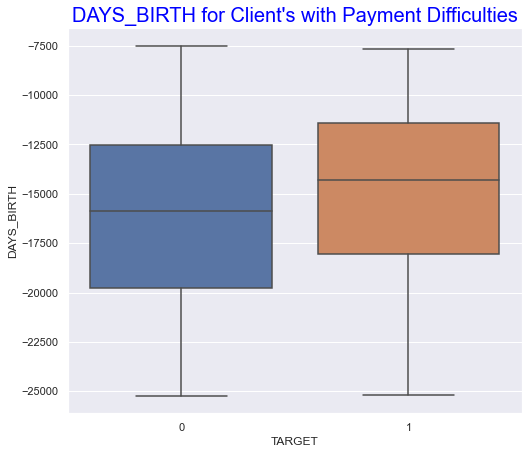

Plotting  DAYS_EMPLOYED


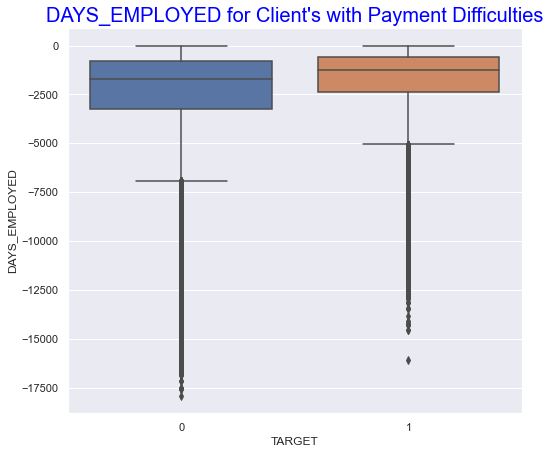

Plotting  DAYS_REGISTRATION


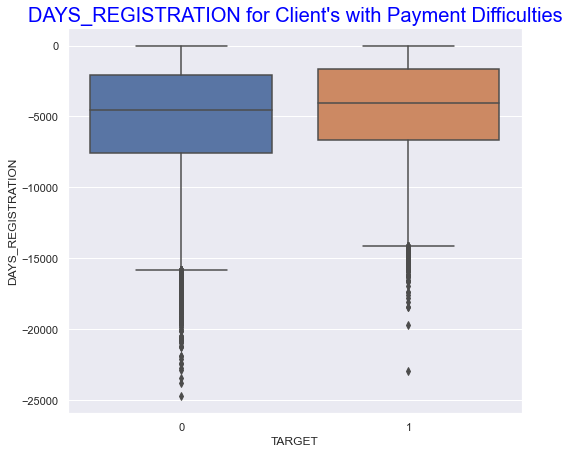

Plotting  DAYS_ID_PUBLISH


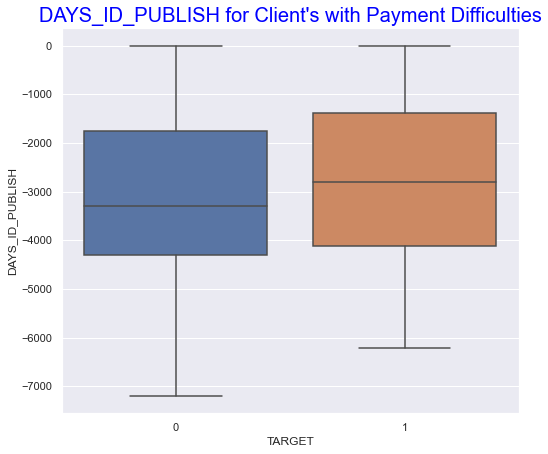

Plotting  OWN_CAR_AGE


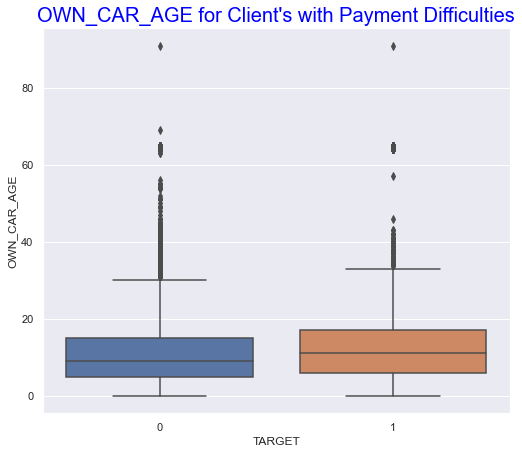

Plotting  FLAG_MOBIL


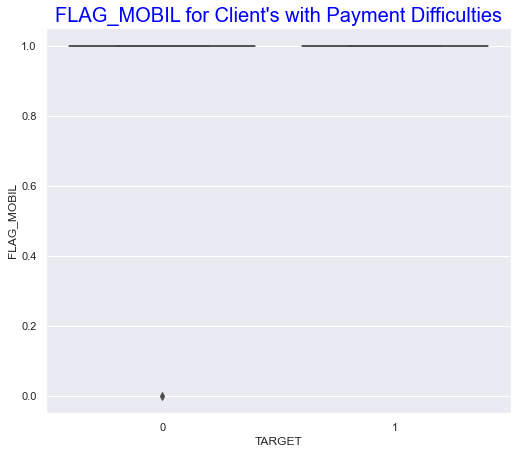

Plotting  FLAG_EMP_PHONE


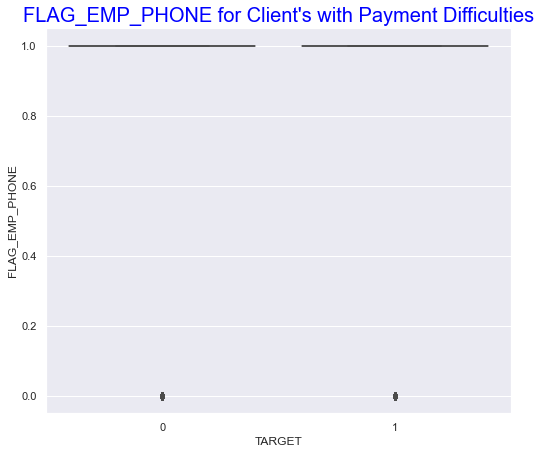

Plotting  FLAG_WORK_PHONE


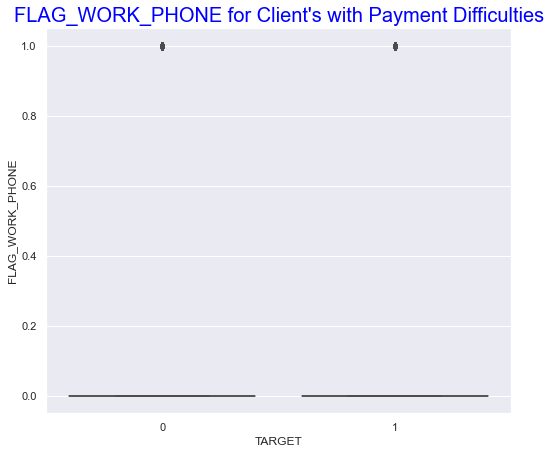

Plotting  FLAG_CONT_MOBILE


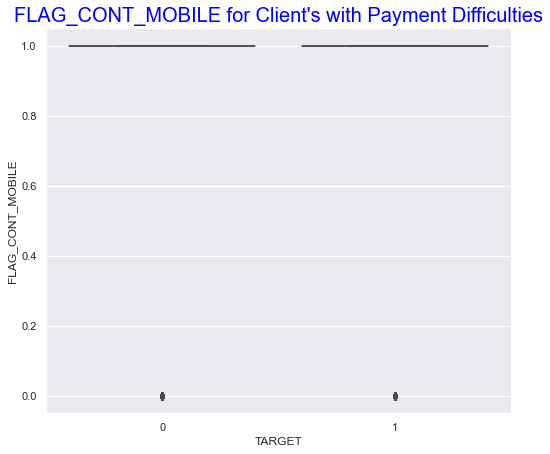

Plotting  FLAG_PHONE


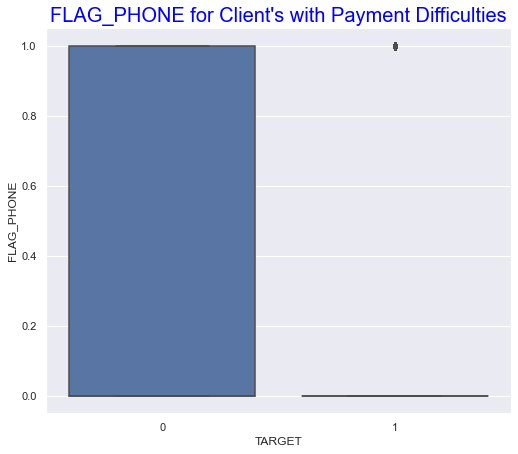

Plotting  FLAG_EMAIL


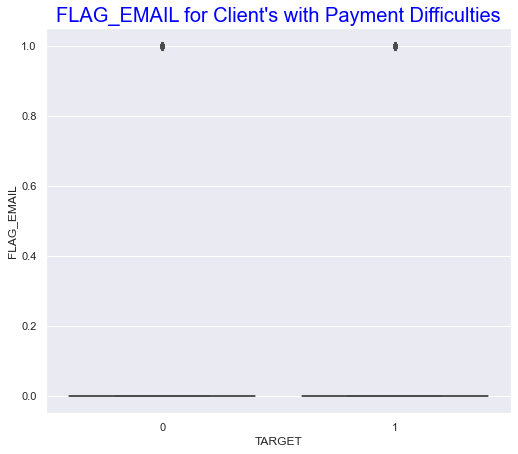

Plotting  CNT_FAM_MEMBERS


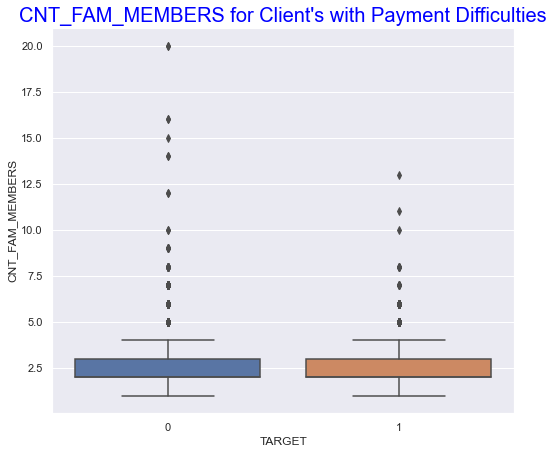

Plotting  REGION_RATING_CLIENT


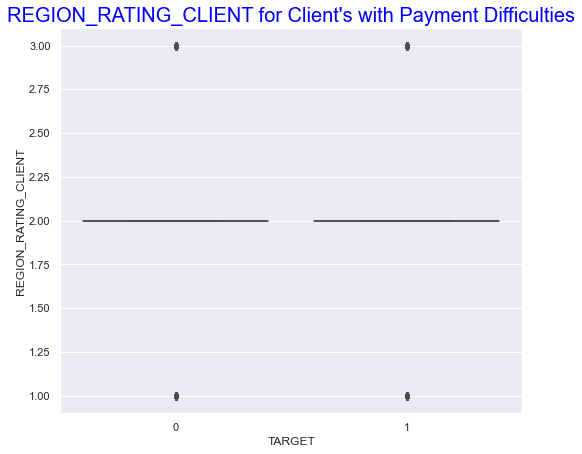

Plotting  REGION_RATING_CLIENT_W_CITY


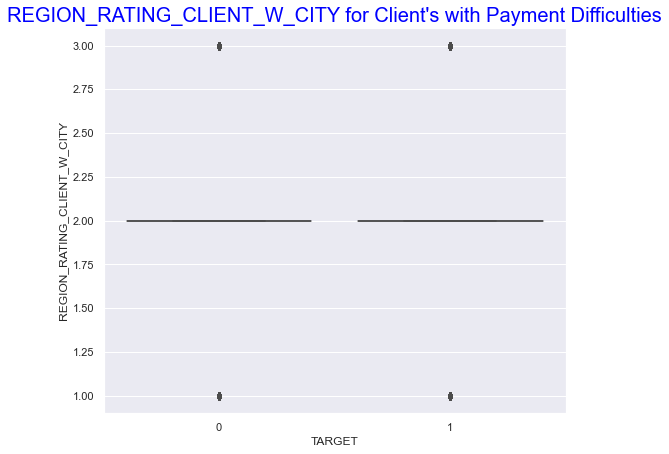

Plotting  HOUR_APPR_PROCESS_START


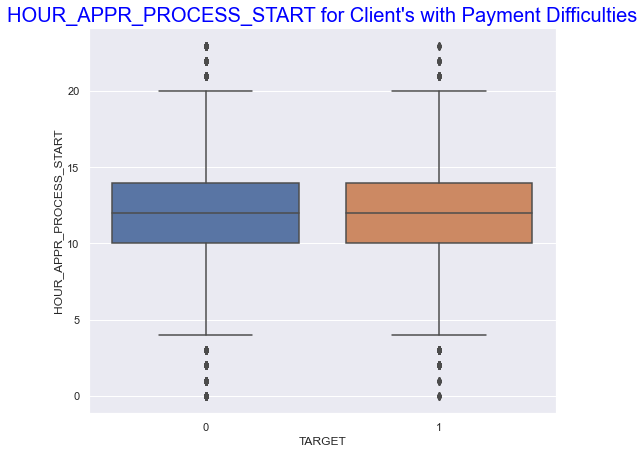

Plotting  REG_REGION_NOT_LIVE_REGION


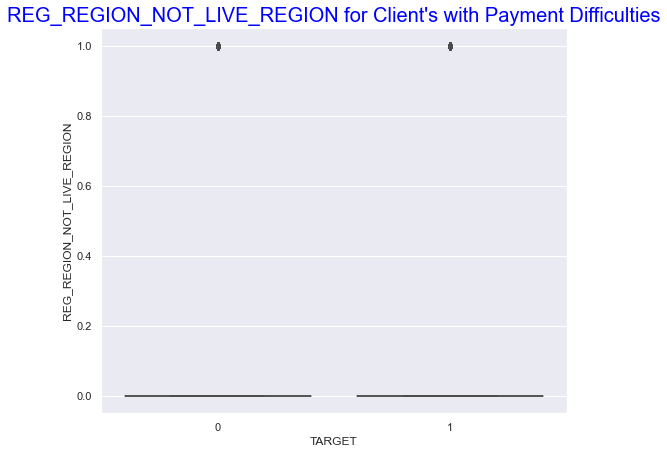

Plotting  REG_REGION_NOT_WORK_REGION


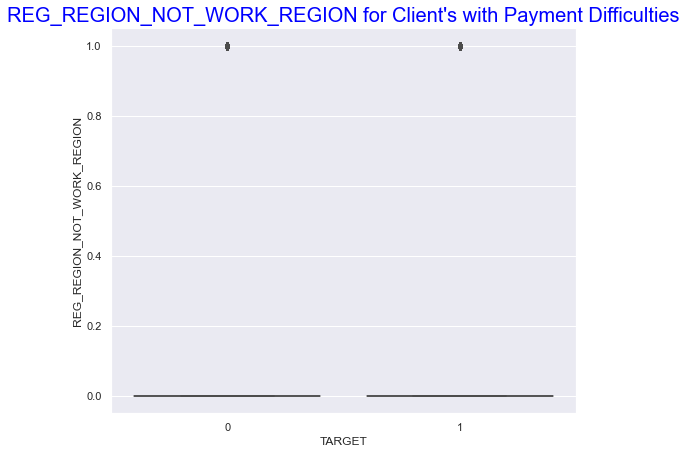

Plotting  LIVE_REGION_NOT_WORK_REGION


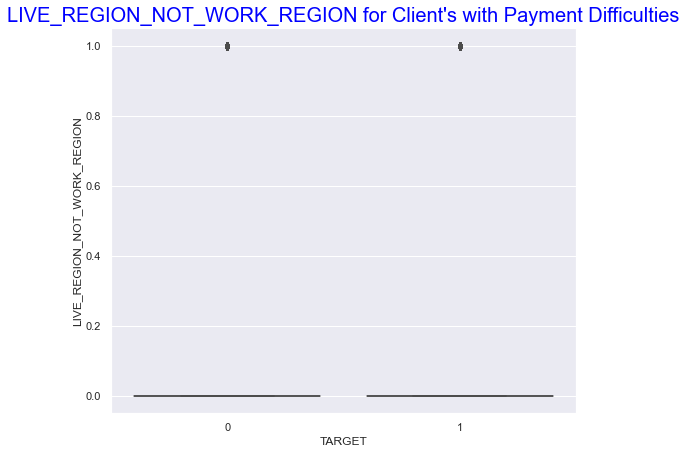

Plotting  REG_CITY_NOT_LIVE_CITY


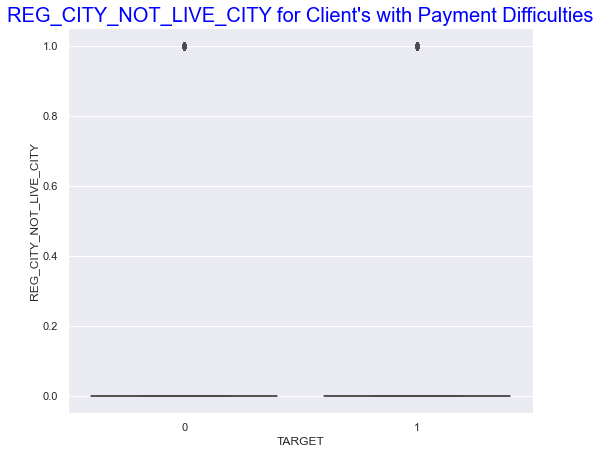

Plotting  REG_CITY_NOT_WORK_CITY


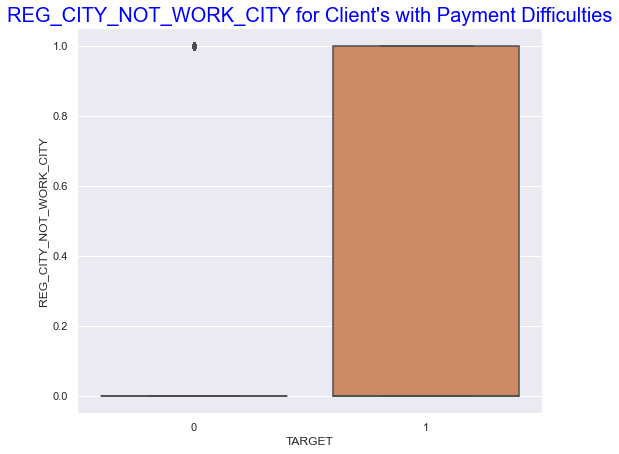

Plotting  LIVE_CITY_NOT_WORK_CITY


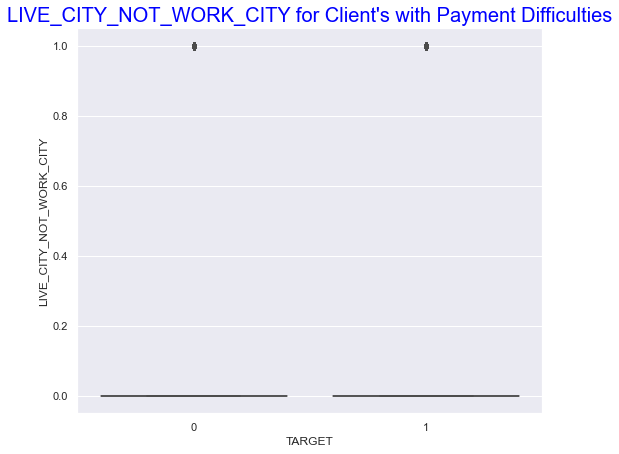

Plotting  EXT_SOURCE_1


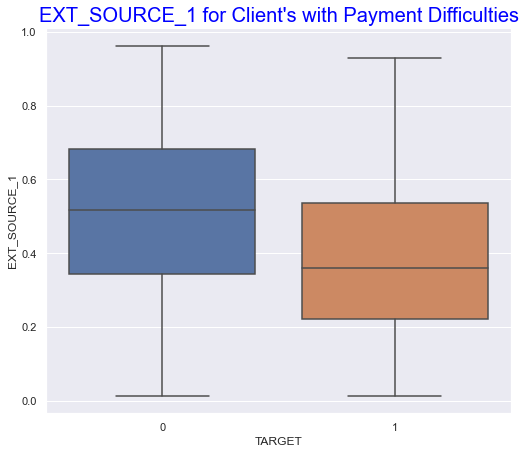

Plotting  EXT_SOURCE_2


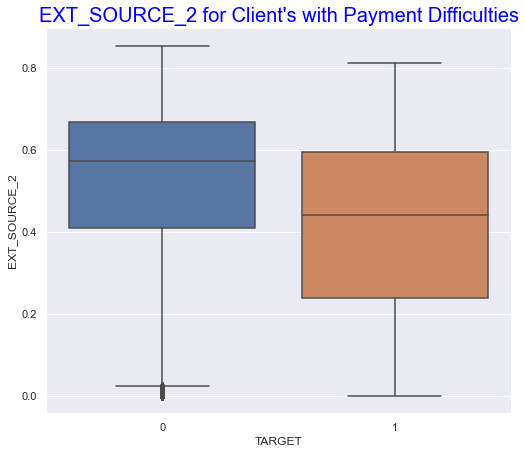

Plotting  EXT_SOURCE_3


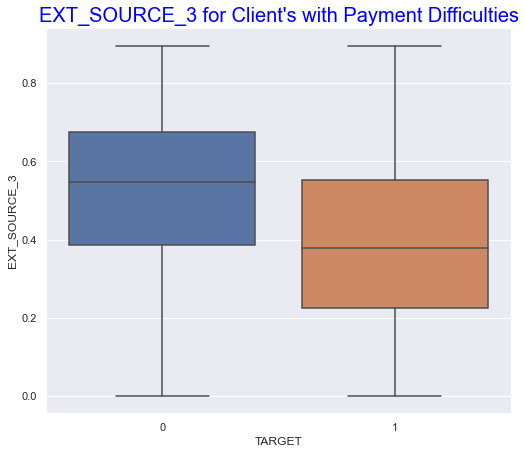

Plotting  OBS_30_CNT_SOCIAL_CIRCLE


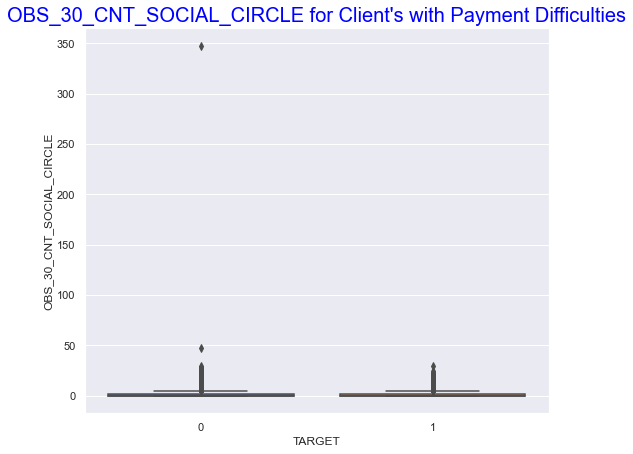

Plotting  DEF_30_CNT_SOCIAL_CIRCLE


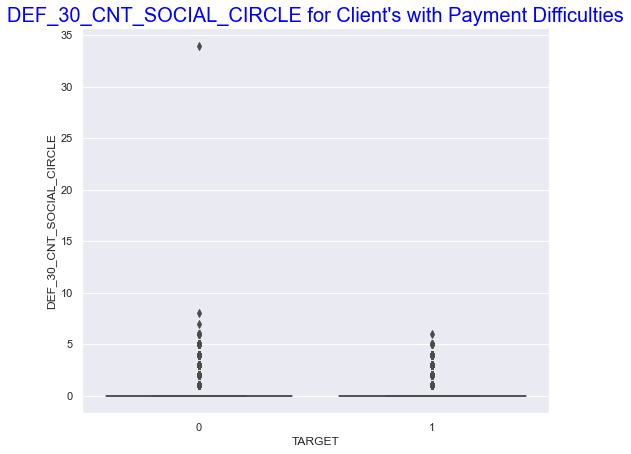

Plotting  OBS_60_CNT_SOCIAL_CIRCLE


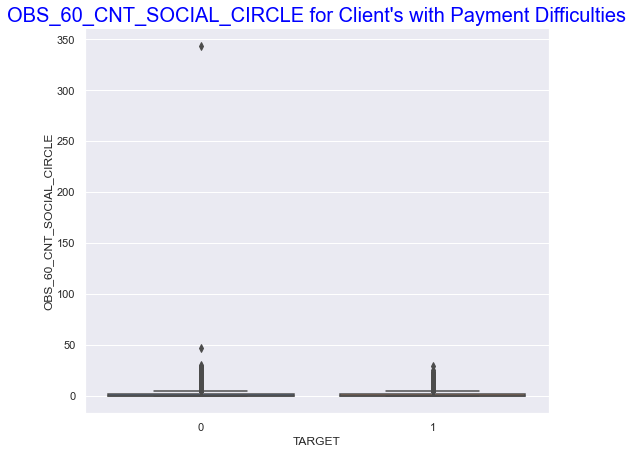

Plotting  DEF_60_CNT_SOCIAL_CIRCLE


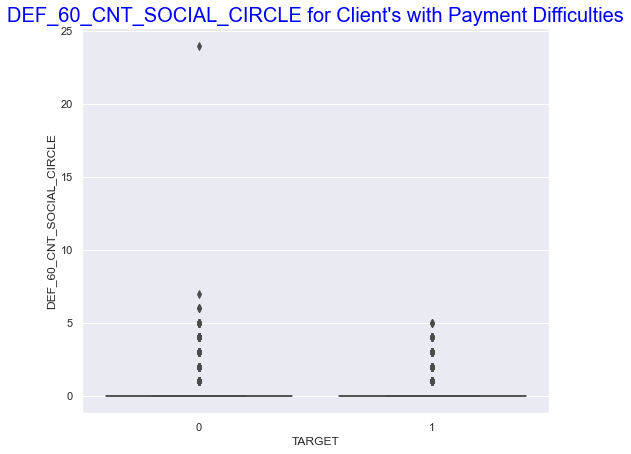

Plotting  DAYS_LAST_PHONE_CHANGE


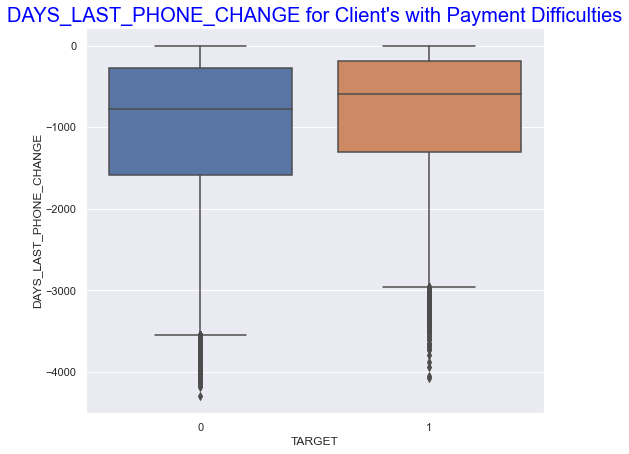

Plotting  FLAG_DOCUMENT_2


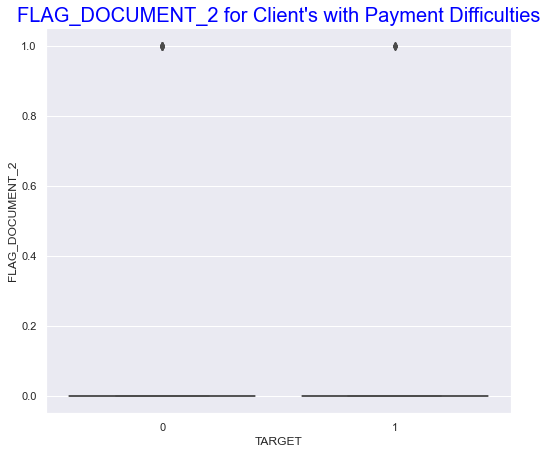

Plotting  FLAG_DOCUMENT_3


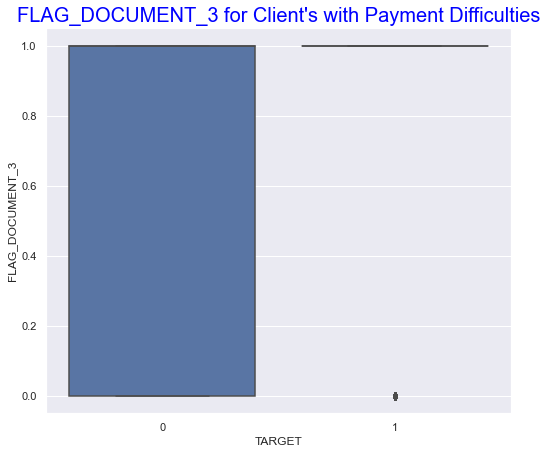

Plotting  FLAG_DOCUMENT_4


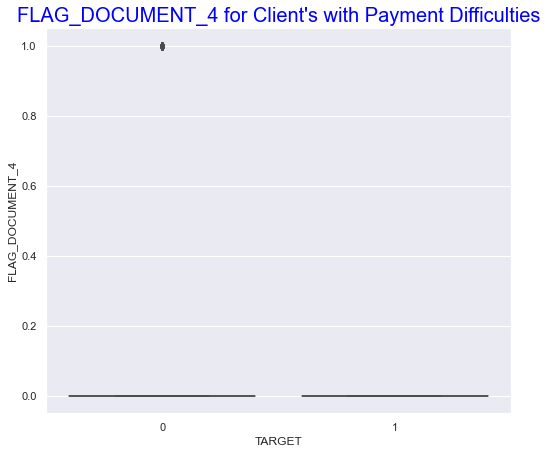

Plotting  FLAG_DOCUMENT_5


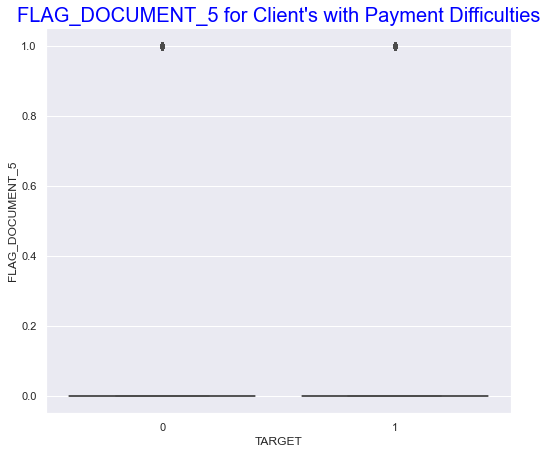

Plotting  FLAG_DOCUMENT_6


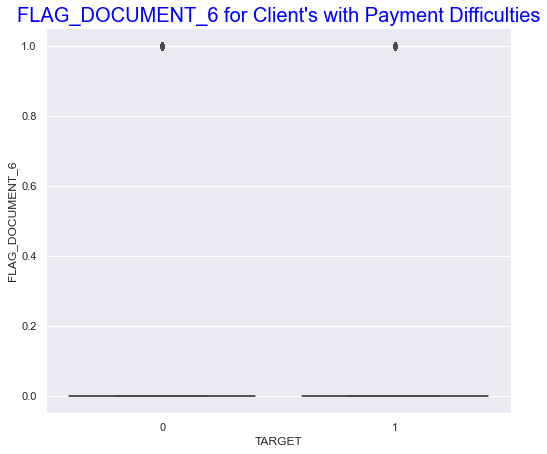

Plotting  FLAG_DOCUMENT_7


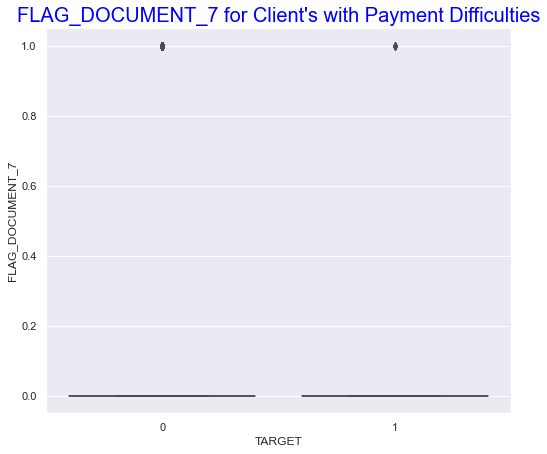

Plotting  FLAG_DOCUMENT_8


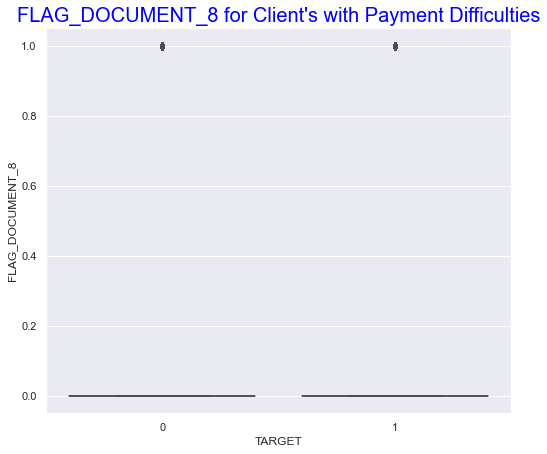

Plotting  FLAG_DOCUMENT_9


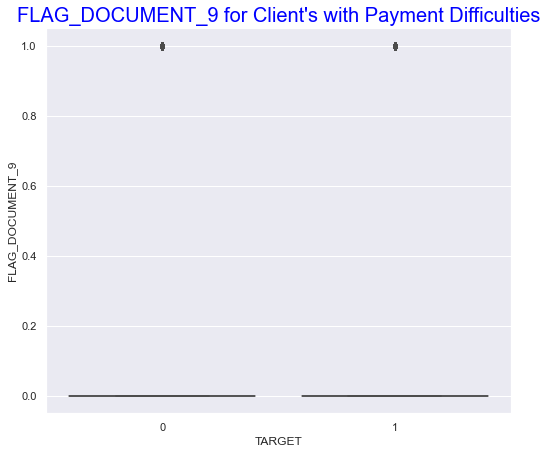

Plotting  FLAG_DOCUMENT_10


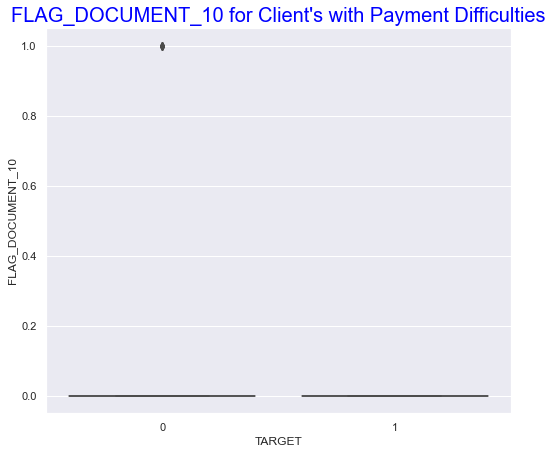

Plotting  FLAG_DOCUMENT_11


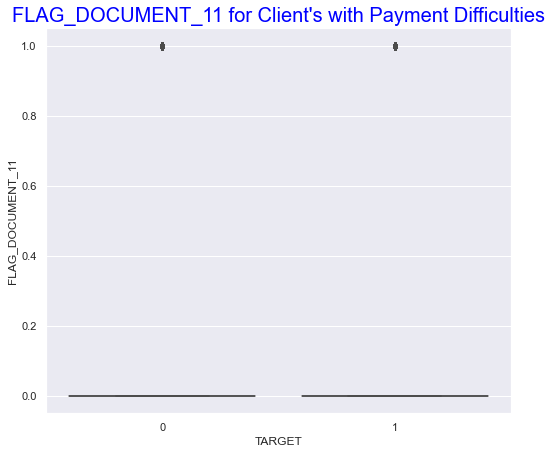

Plotting  FLAG_DOCUMENT_12


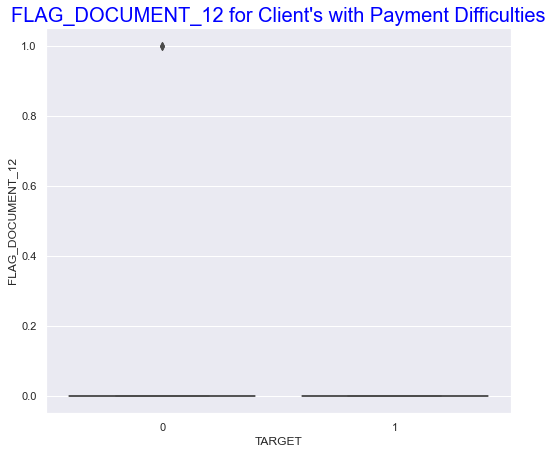

Plotting  FLAG_DOCUMENT_13


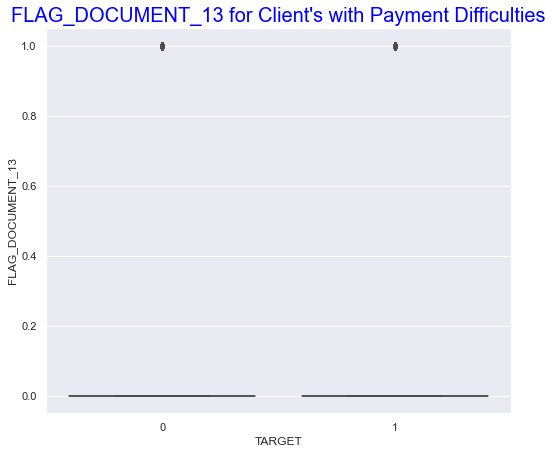

Plotting  FLAG_DOCUMENT_14


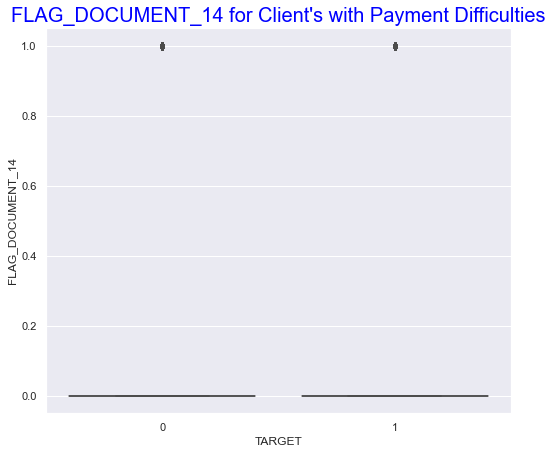

Plotting  FLAG_DOCUMENT_15


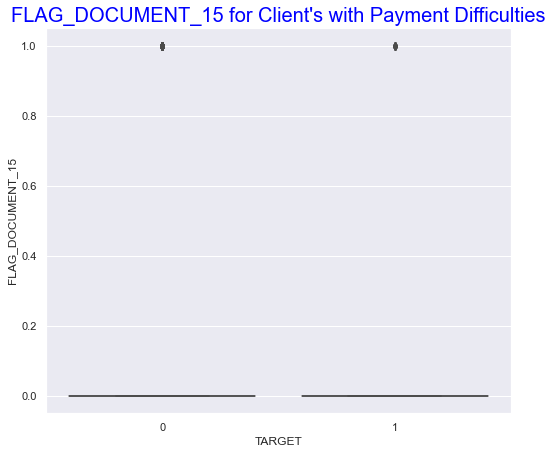

Plotting  FLAG_DOCUMENT_16


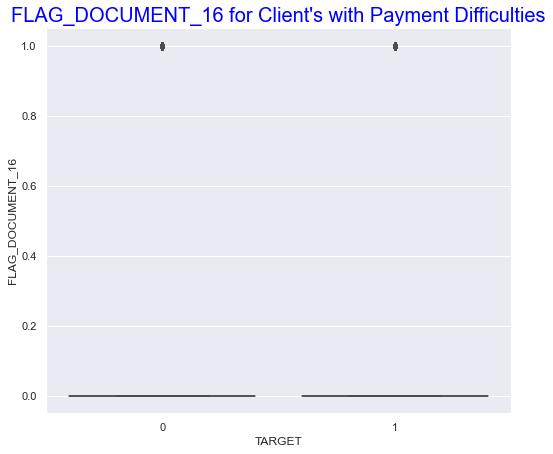

Plotting  FLAG_DOCUMENT_17


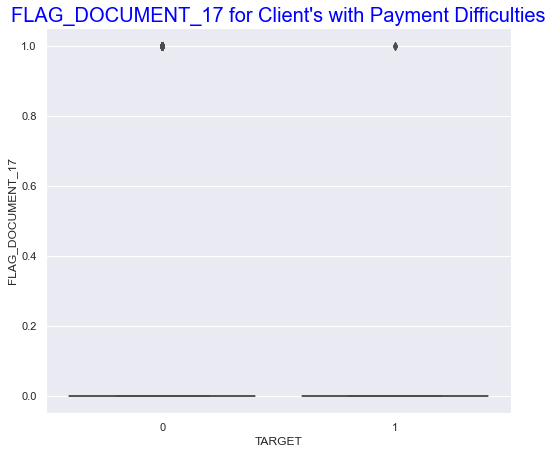

Plotting  FLAG_DOCUMENT_18


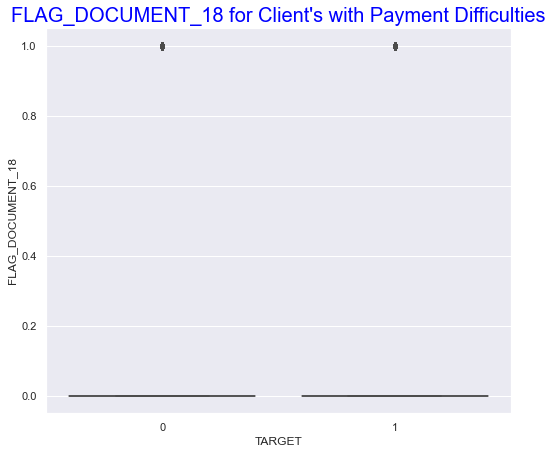

Plotting  FLAG_DOCUMENT_19


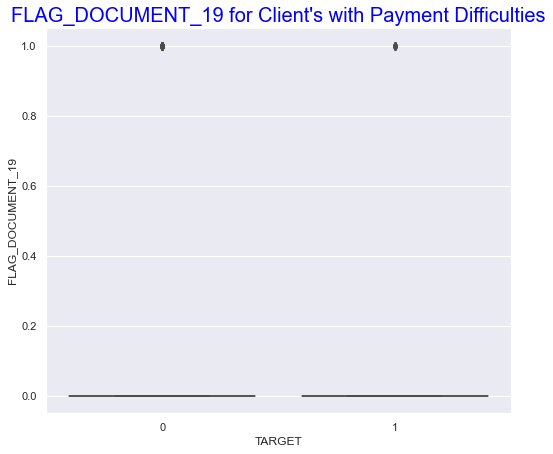

Plotting  FLAG_DOCUMENT_20


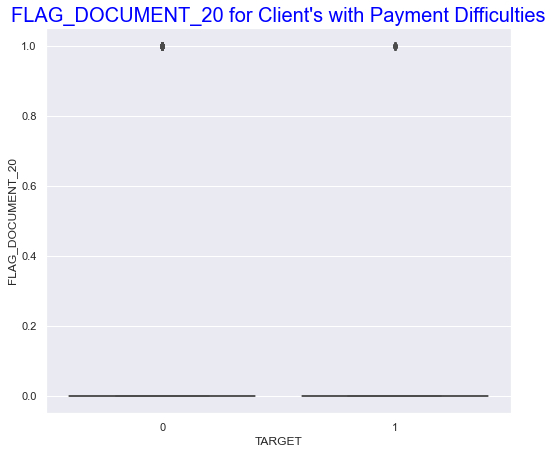

Plotting  FLAG_DOCUMENT_21


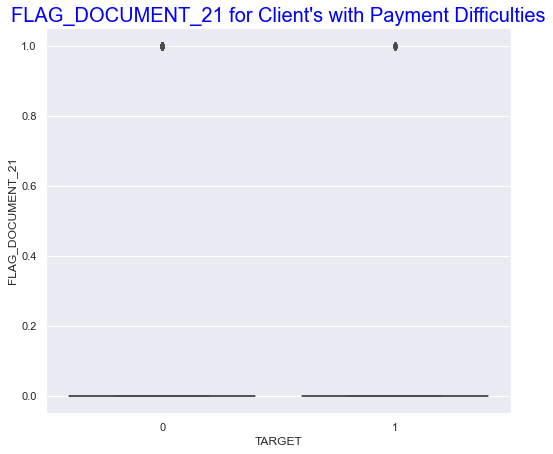

Plotting  AMT_REQ_CREDIT_BUREAU_HOUR


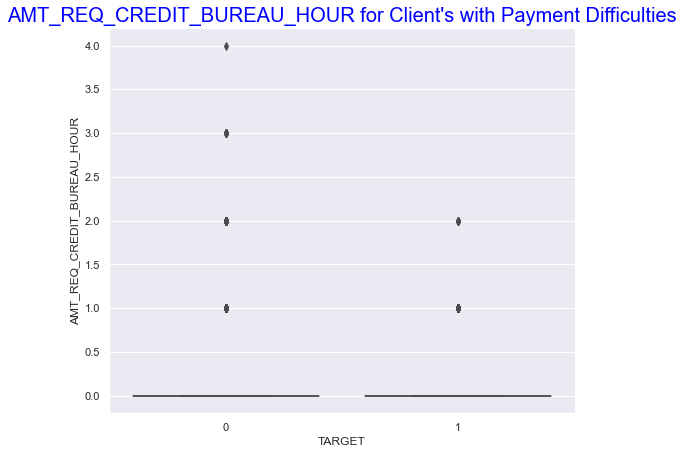

Plotting  AMT_REQ_CREDIT_BUREAU_DAY


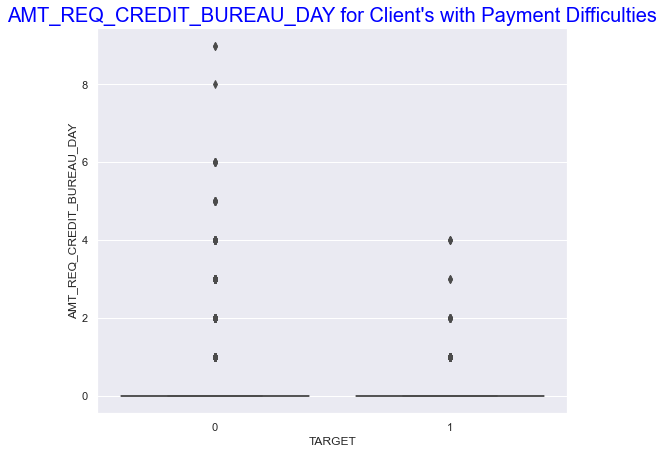

Plotting  AMT_REQ_CREDIT_BUREAU_WEEK


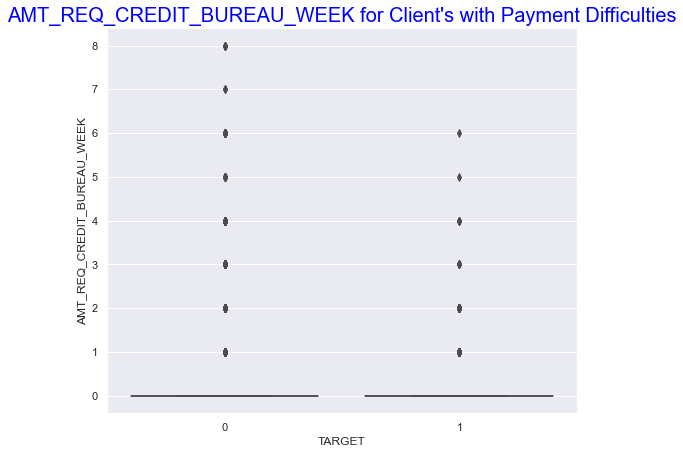

Plotting  AMT_REQ_CREDIT_BUREAU_MON


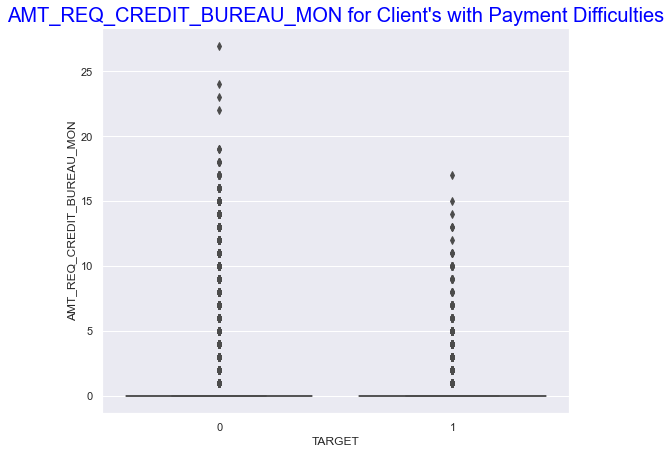

Plotting  AMT_REQ_CREDIT_BUREAU_QRT


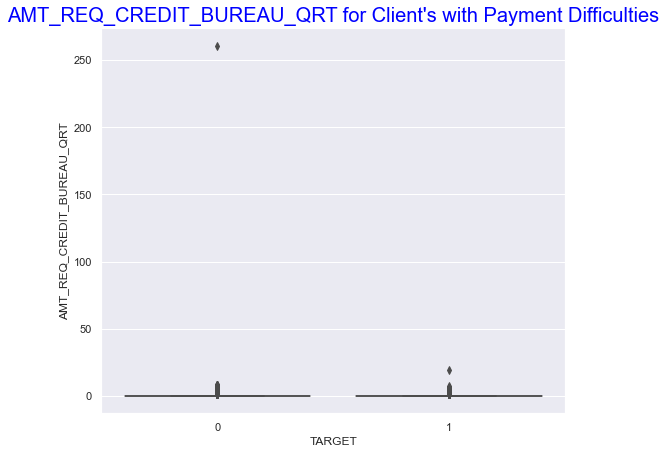

Plotting  AMT_REQ_CREDIT_BUREAU_YEAR


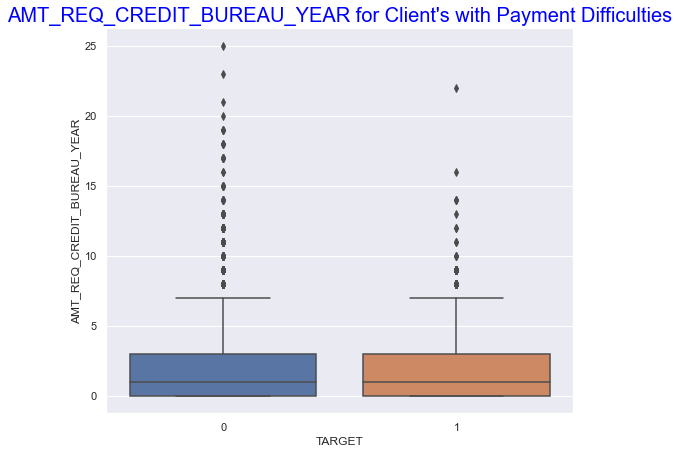

Plotting  AGE


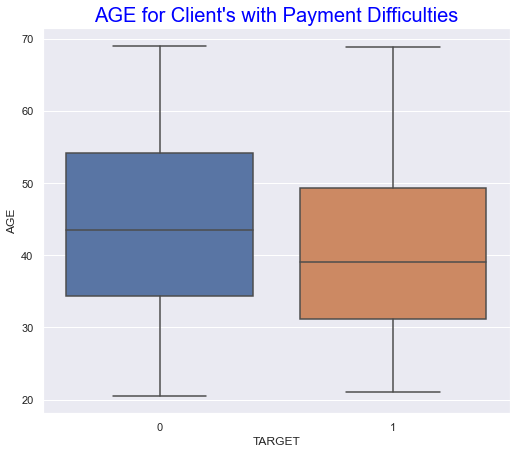

In [183]:
for column in numerical_columns:
    print("Plotting ", column)
    num_plotting(app_data, column)

- ###  5.7.1: Bivariate Analysis - Days_Birth Vs Target

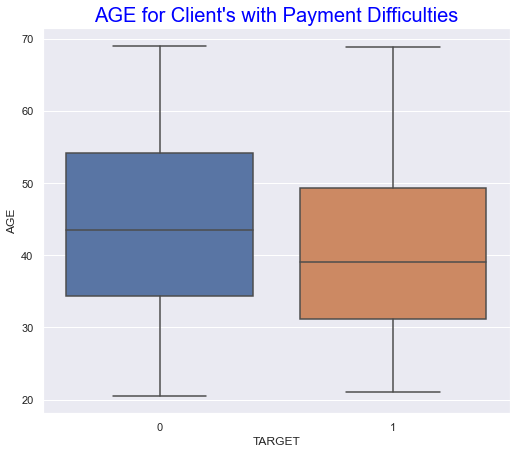

In [184]:
num_plotting(app_data, 'AGE')

- __Insights__:  
    * Older clients (ages between 35 and 55) tend to make payments promptly
    * Majority of defaulters are younger (ages between 30 and 50) when compared with ones who makes ontime payments

- ###  5.7.2: Bivariate Analysis - Days_Employed Vs Target

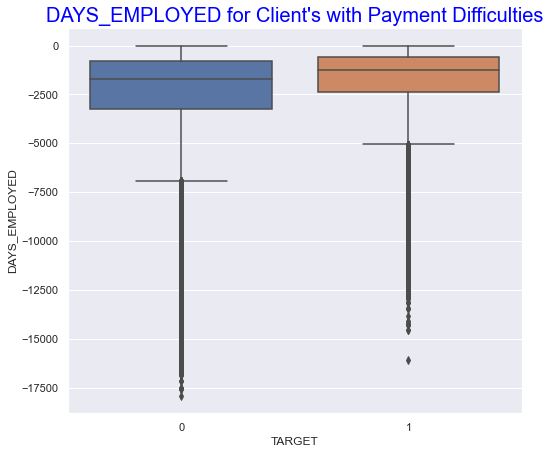

In [185]:
num_plotting(app_data, 'DAYS_EMPLOYED')

- __Insights__:  
    * Clients who have stayed longer in their current jobs are tend to repay their loans promptly
    * Eventhough the mean for both client's who have changed their jobs recently and for those one's who has not are close, there is significant difference is their interquartile range

- ###  5.7.3: Bivariate Analysis - Days_Last_Phone_Changed Vs Target

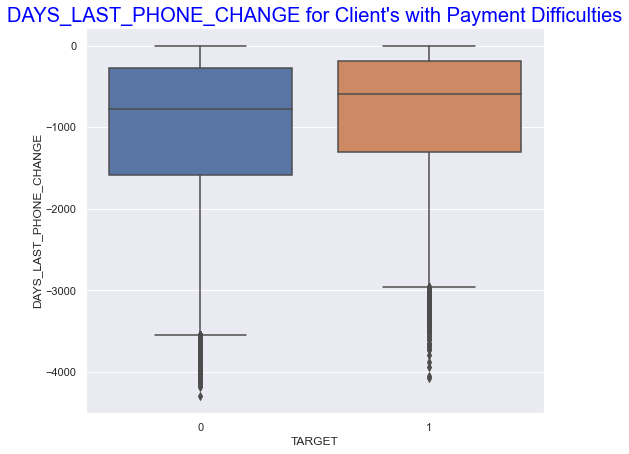

In [186]:
num_plotting(app_data, 'DAYS_LAST_PHONE_CHANGE')

- __Insights__:  
    * Client's who have recently changed their Phone number are more prone to be a defaulter
    * Eventhough interquartile range for customers without any payment difficulties is wider, they have almost same mean as defaulters

- ###  5.7.4: Bivariate Analysis - Days_Registration Vs Target 

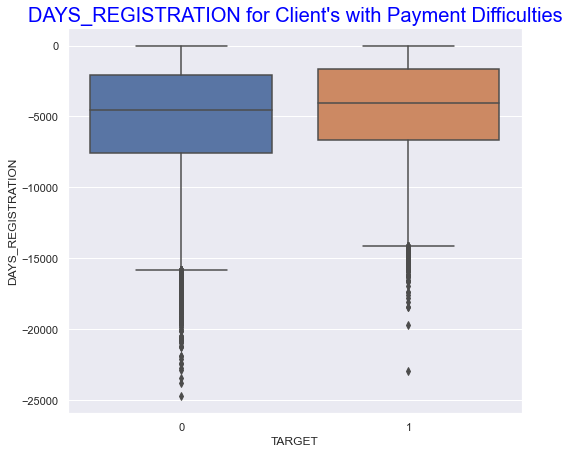

In [187]:
num_plotting(app_data, 'DAYS_REGISTRATION')

- __Insights__:  
    * Client's who have recently changed their Registration are more prone to be a defaulter
    * Eventhough interquartile range for customers without any payment difficulties is wider, they have almost same mean as defaulters

- ###  5.7.5: Bivariate Analysis - Days_ID_Publish Vs Target 

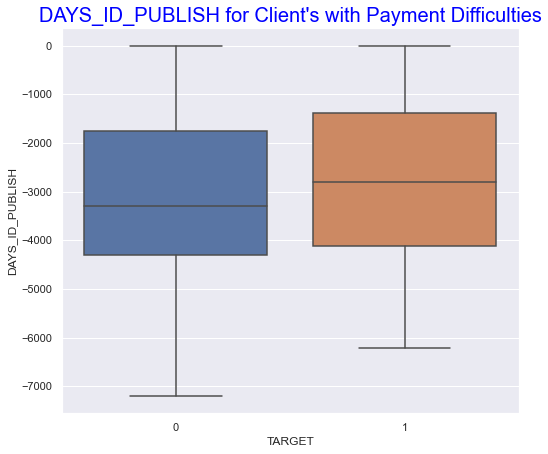

In [188]:
num_plotting(app_data, 'DAYS_ID_PUBLISH')

- __Insights__:  
    * Client's who have recently changed their Identification document are more prone to be a defaulter
    * Eventhough interquartile range for customers without any payment difficulties is wider, they have almost same mean as defaulters

- ###  5.7.6: Bivariate Analysis - Ext_Source_1 Vs Target 

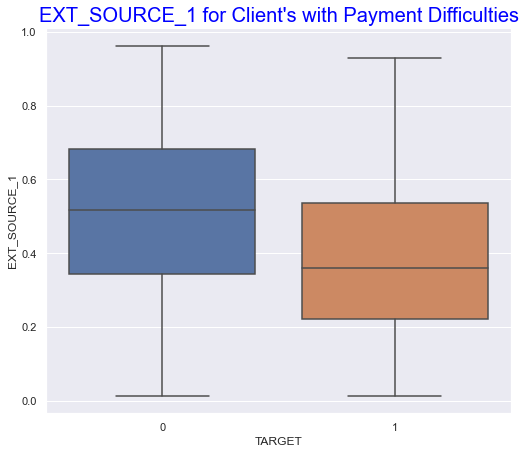

In [189]:
num_plotting(app_data, 'EXT_SOURCE_1')

###  Step 6: Correlation between Numerical columns

Analyzing multiple Numerical columns to find out their correlations

- ###  6.1: Correlation between Numerical Columns for Customers with NO payment difficulties

In [190]:
# Find correlation matrix and take absolute values, so that we can elimate one half of the correlation which is repeated

NO_PAY_DIFF.corr().abs()

SK_ID_CURR  TARGET  CNT_CHILDREN  \
SK_ID_CURR                     1.000000     NaN      0.000716   
TARGET                              NaN     NaN           NaN   
CNT_CHILDREN                   0.000716     NaN      1.000000   
AMT_INCOME_TOTAL               0.001739     NaN      0.027397   
AMT_CREDIT                     0.000342     NaN      0.003081   
AMT_ANNUITY                    0.000068     NaN      0.020905   
AMT_GOODS_PRICE                0.000361     NaN      0.000720   
REGION_POPULATION_RELATIVE     0.000360     NaN      0.024363   
DAYS_BIRTH                     0.001346     NaN      0.336966   
DAYS_EMPLOYED                  0.000005     NaN      0.063036   
DAYS_REGISTRATION              0.001475     NaN      0.185792   
DAYS_ID_PUBLISH                0.000077     NaN      0.028751   
OWN_CAR_AGE                    0.003019     NaN      0.008381   
FLAG_MOBIL                     0.002925     NaN      0.001080   
FLAG_EMP_PHONE                 0.001717     NaN      0.244274   
FLAG_WORK_PHONE                0.000854     NaN      0.055453   
FLAG_CONT_MOBILE               0.003319     NaN      0.001201   
FLAG_PHONE                     0.001408     NaN      0.029929   
FLAG_EMAIL                     0.000229     NaN      0.023460   
CNT_FAM_MEMBERS                0.002790     NaN      0.878571   
REGION_RATING_CLIENT           0.000519     NaN      0.022842   
REGION_RATING_CLIENT_W_CITY    0.000739     NaN      0.021866   
HOUR_APPR_PROCESS_START        0.000115     NaN      0.005244   
REG_REGION_NOT_LIVE_REGION     0.000104     NaN      0.012342   
REG_REGION_NOT_WORK_REGION     0.000836     NaN      0.010857   
LIVE_REGION_NOT_WORK_REGION    0.002784     NaN      0.017326   
REG_CITY_NOT_LIVE_CITY         0.002885     NaN      0.021587   
REG_CITY_NOT_WORK_CITY         0.001696     NaN      0.072193   
LIVE_CITY_NOT_WORK_CITY        0.000428     NaN      0.070988   
EXT_SOURCE_1                   0.000529     NaN      0.142540   
EXT_SOURCE_2                   0.001589     NaN      0.015455   
EXT_SOURCE_3                   0.000309     NaN      0.041729   
OBS_30_CNT_SOCIAL_CIRCLE       0.000695     NaN      0.014471   
DEF_30_CNT_SOCIAL_CIRCLE       0.000556     NaN      0.002246   
OBS_60_CNT_SOCIAL_CIRCLE       0.000741     NaN      0.014137   
DEF_60_CNT_SOCIAL_CIRCLE       0.002382     NaN      0.002172   
DAYS_LAST_PHONE_CHANGE         0.000998     NaN      0.008501   
FLAG_DOCUMENT_2                0.001342     NaN      0.003736   
FLAG_DOCUMENT_3                0.003217     NaN      0.055718   
FLAG_DOCUMENT_4                0.004321     NaN      0.003833   
FLAG_DOCUMENT_5                0.001426     NaN      0.016239   
FLAG_DOCUMENT_6                0.001972     NaN      0.158963   
FLAG_DOCUMENT_7                0.003047     NaN      0.001442   
FLAG_DOCUMENT_8                0.001618     NaN      0.053919   
FLAG_DOCUMENT_9                0.002007     NaN      0.002358   
FLAG_DOCUMENT_10               0.000852     NaN      0.002859   
FLAG_DOCUMENT_11               0.001900     NaN      0.005059   
FLAG_DOCUMENT_12               0.001092     NaN      0.000322   
FLAG_DOCUMENT_13               0.001006     NaN      0.004340   
FLAG_DOCUMENT_14               0.001236     NaN      0.005455   
FLAG_DOCUMENT_15               0.002330     NaN      0.003710   
FLAG_DOCUMENT_16               0.000753     NaN      0.011775   
FLAG_DOCUMENT_17               0.001776     NaN      0.001160   
FLAG_DOCUMENT_18               0.001194     NaN      0.004181   
FLAG_DOCUMENT_19               0.000676     NaN      0.001078   
FLAG_DOCUMENT_20               0.000832     NaN      0.001302   
FLAG_DOCUMENT_21               0.000485     NaN      0.002983   
AMT_REQ_CREDIT_BUREAU_HOUR     0.001774     NaN      0.000147   
AMT_REQ_CREDIT_BUREAU_DAY      0.001626     NaN      0.001057   
AMT_REQ_CREDIT_BUREAU_WEEK     0.002298     NaN      0.000315   
AMT_REQ_CREDIT_BUREAU_MON      0.000037     NaN      0.007640   

In [191]:
# Convert the correlation matrix to data frame structure again

NO_PAY_DIFF.corr().abs().unstack()

SK_ID_CURR  SK_ID_CURR                    1.000000
            TARGET                             NaN
            CNT_CHILDREN                  0.000716
            AMT_INCOME_TOTAL              0.001739
            AMT_CREDIT                    0.000342
                                            ...   
AGE         AMT_REQ_CREDIT_BUREAU_WEEK    0.003570
            AMT_REQ_CREDIT_BUREAU_MON     0.001871
            AMT_REQ_CREDIT_BUREAU_QRT     0.015427
            AMT_REQ_CREDIT_BUREAU_YEAR    0.077657
            AGE                           1.000000
Length: 4096, dtype: float64

In [192]:
#Sort the data frame

NO_PAY_DIFF.corr().abs().unstack().sort_values(kind='quicksort')

AMT_REQ_CREDIT_BUREAU_HOUR  FLAG_DOCUMENT_15              2.064400e-07
FLAG_DOCUMENT_15            AMT_REQ_CREDIT_BUREAU_HOUR    2.064400e-07
FLAG_DOCUMENT_2             EXT_SOURCE_2                  3.976804e-06
EXT_SOURCE_2                FLAG_DOCUMENT_2               3.976804e-06
DAYS_EMPLOYED               SK_ID_CURR                    4.947514e-06
                                                              ...     
AMT_REQ_CREDIT_BUREAU_WEEK  TARGET                                 NaN
AMT_REQ_CREDIT_BUREAU_MON   TARGET                                 NaN
AMT_REQ_CREDIT_BUREAU_QRT   TARGET                                 NaN
AMT_REQ_CREDIT_BUREAU_YEAR  TARGET                                 NaN
AGE                         TARGET                                 NaN
Length: 4096, dtype: float64

In [193]:
# Drop the NULL values from the correlation data frame

NO_PAY_DIFF.corr().abs().unstack().sort_values(kind='quicksort').dropna()

AMT_REQ_CREDIT_BUREAU_HOUR  FLAG_DOCUMENT_15              2.064400e-07
FLAG_DOCUMENT_15            AMT_REQ_CREDIT_BUREAU_HOUR    2.064400e-07
FLAG_DOCUMENT_2             EXT_SOURCE_2                  3.976804e-06
EXT_SOURCE_2                FLAG_DOCUMENT_2               3.976804e-06
DAYS_EMPLOYED               SK_ID_CURR                    4.947514e-06
                                                              ...     
FLAG_DOCUMENT_9             FLAG_DOCUMENT_9               1.000000e+00
FLAG_DOCUMENT_10            FLAG_DOCUMENT_10              1.000000e+00
AGE                         AGE                           1.000000e+00
                            DAYS_BIRTH                    1.000000e+00
DAYS_BIRTH                  AGE                           1.000000e+00
Length: 3959, dtype: float64

In [194]:
# Save the output data frame to a new data frame "correlation_pay_diff"

correlation_no_pay_diff = NO_PAY_DIFF.corr().abs().unstack().sort_values(kind='quicksort').dropna()
correlation_no_pay_diff

AMT_REQ_CREDIT_BUREAU_HOUR  FLAG_DOCUMENT_15              2.064400e-07
FLAG_DOCUMENT_15            AMT_REQ_CREDIT_BUREAU_HOUR    2.064400e-07
FLAG_DOCUMENT_2             EXT_SOURCE_2                  3.976804e-06
EXT_SOURCE_2                FLAG_DOCUMENT_2               3.976804e-06
DAYS_EMPLOYED               SK_ID_CURR                    4.947514e-06
                                                              ...     
FLAG_DOCUMENT_9             FLAG_DOCUMENT_9               1.000000e+00
FLAG_DOCUMENT_10            FLAG_DOCUMENT_10              1.000000e+00
AGE                         AGE                           1.000000e+00
                            DAYS_BIRTH                    1.000000e+00
DAYS_BIRTH                  AGE                           1.000000e+00
Length: 3959, dtype: float64

In [195]:
# Remove the left diagonal value from the correlation data frame

correlation_no_pay_diff = correlation_no_pay_diff[correlation_no_pay_diff < 1.0]
correlation_no_pay_diff

AMT_REQ_CREDIT_BUREAU_HOUR  FLAG_DOCUMENT_15               2.064400e-07
FLAG_DOCUMENT_15            AMT_REQ_CREDIT_BUREAU_HOUR     2.064400e-07
FLAG_DOCUMENT_2             EXT_SOURCE_2                   3.976804e-06
EXT_SOURCE_2                FLAG_DOCUMENT_2                3.976804e-06
DAYS_EMPLOYED               SK_ID_CURR                     4.947514e-06
                                                               ...     
REGION_RATING_CLIENT        REGION_RATING_CLIENT_W_CITY    9.501488e-01
AMT_GOODS_PRICE             AMT_CREDIT                     9.874908e-01
AMT_CREDIT                  AMT_GOODS_PRICE                9.874908e-01
OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE       9.985085e-01
OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE       9.985085e-01
Length: 3894, dtype: float64

In [196]:
# Top 10 correlations for customers without any Payment difficulties

correlation_no_pay_diff.tail(20)

FLAG_EMP_PHONE               AGE                            0.622073
AGE                          FLAG_EMP_PHONE                 0.622073
AMT_ANNUITY                  AMT_CREDIT                     0.771309
AMT_CREDIT                   AMT_ANNUITY                    0.771309
AMT_ANNUITY                  AMT_GOODS_PRICE                0.777150
AMT_GOODS_PRICE              AMT_ANNUITY                    0.777150
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.830381
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.830381
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.859332
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.859332
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.861861
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.861861
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.878571
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.878571
REGION_RATING_CLIENT_W_CITY  REGIO

- ###  6.2: Plotting Top 10 Correlation between Numerical Columns for Customers with NO payment difficulties

In [197]:
# Creating list of columns that's part of Top 10 Correlations for Customers with NO payment difficulties

top_10_cols = [x[0] for x in correlation_no_pay_diff.tail(10).index]
top_10_cols

['REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT_W_CITY',
 'REGION_RATING_CLIENT',
 'AMT_GOODS_PRICE',
 'AMT_CREDIT',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE']

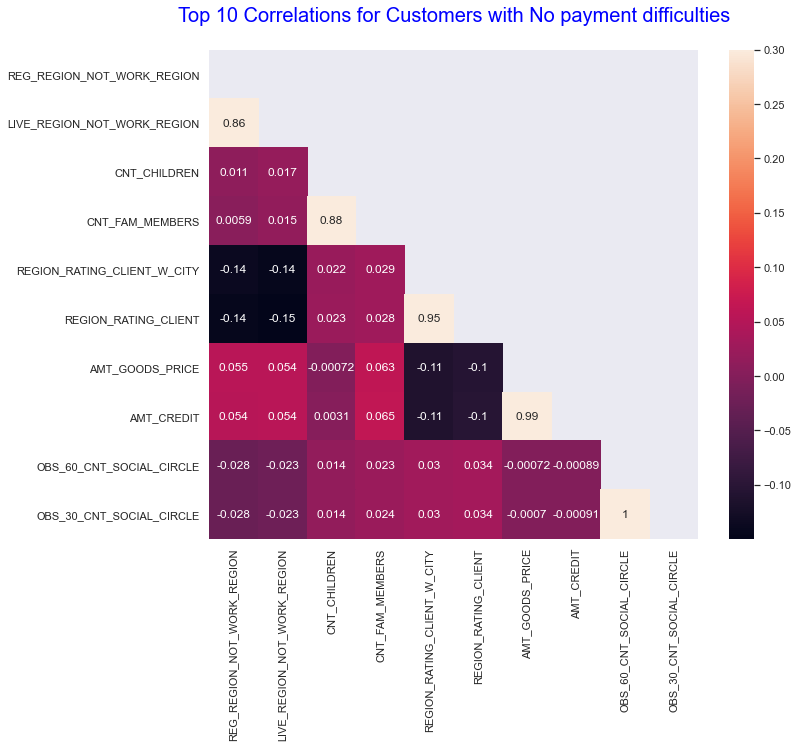

In [198]:
# Plotting the Correlation matrix onto a Heat map

corr = NO_PAY_DIFF[top_10_cols].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True);
    
plt.title('Top 10 Correlations for Customers with No payment difficulties\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
plt.show()

- ###  6.3: Correlation between Numerical Columns for Customers WITH payment difficulties

In [199]:
corr_with_pay_diff = WITH_PAY_DIFF.corr().abs()
corr_with_pay_diff = corr_with_pay_diff.unstack().sort_values(kind='quicksort')
corr_with_pay_diff = corr_with_pay_diff.dropna()
corr_with_pay_diff = corr_with_pay_diff[corr_with_pay_diff < 1.0 ]
print(corr_with_pay_diff.tail(10))
top_10_defaulter_cols = [x[0] for x in corr_with_pay_diff.tail(10).index]
top_10_defaulter_cols

DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.868994
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.868994
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.885481
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.885481
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.956637
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.956637
AMT_GOODS_PRICE              AMT_CREDIT                     0.983235
AMT_CREDIT                   AMT_GOODS_PRICE                0.983235
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998269
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998269
dtype: float64


['DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'AMT_GOODS_PRICE',
 'AMT_CREDIT',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE']

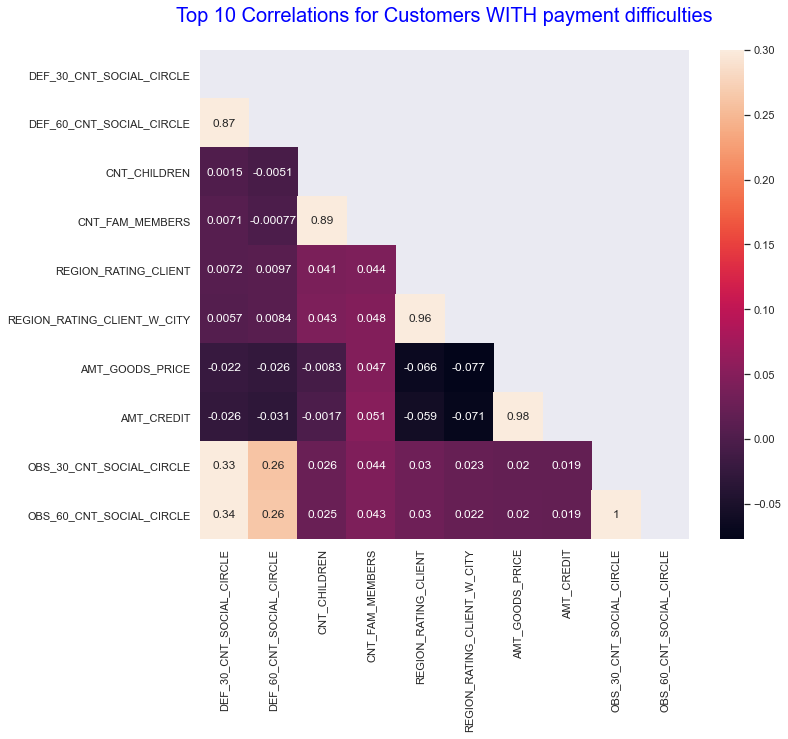

In [200]:
# Plotting the Correlation matrix onto a Heat map

corr = WITH_PAY_DIFF[top_10_defaulter_cols].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True);
    
plt.title('Top 10 Correlations for Customers WITH payment difficulties\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
plt.show()

###  Step 7: Analyzing Data from previous applications

Analyzing previou application data

- ###  7.1: Reading "previou_application.csv" file

In [201]:
# Reading the csv file using 'read_csv'.
prev_app_data = pd.read_csv("previous_application.csv")
prev_app_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [202]:
# Inspecting shape of previous application file data
prev_app_data.shape

(1670214, 37)

In [203]:
#Checking NULL values in previous application file data

prev_app_data.isnull().sum().sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       1664263
RATE_INTEREST_PRIMARY          1664263
RATE_DOWN_PAYMENT               895844
AMT_DOWN_PAYMENT                895844
NAME_TYPE_SUITE                 820405
DAYS_TERMINATION                673065
NFLAG_INSURED_ON_APPROVAL       673065
DAYS_FIRST_DRAWING              673065
DAYS_FIRST_DUE                  673065
DAYS_LAST_DUE_1ST_VERSION       673065
DAYS_LAST_DUE                   673065
AMT_GOODS_PRICE                 385515
AMT_ANNUITY                     372235
CNT_PAYMENT                     372230
PRODUCT_COMBINATION                346
AMT_CREDIT                           1
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
AMT_APPLICATION                      0
NAME_PAYMENT_TYPE                    0
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS     

In [204]:
combined_app_data = pd.merge(app_data, prev_app_data, on='SK_ID_CURR', how='left')
combined_app_data.head() 

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
0        24700.5           351000.0     Unaccompanied          Working   
1        35698.5          1129500.0            Family    State servant   
2        35698.5          1129500.0            Family    State servant   
3        35698.5          1129500.0            Family    State servant   
4         6750.0           135000.0     Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461         -637.0            -3648.0   
1                    0.003541      -16765        -1188.0            -1186.0   
2                    0.003541      -16765        -1188.0            -1186.0   
3                    0.003541      -16765        -1188.0            -1186.0   
4                    0.010032      -19046         -225.0            -4260.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2             -291          NaN           1               1                0   
3             -291          NaN           1               1                0   
4            -2531         26.0           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0      Core staff              2.0   
3                 1           1           0      Core staff              2.0   
4                 1           1           0        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                    WEDNESDAY                         10   
1                       MONDAY                         11   
2                       MONDAY                         11   
3                       MONDAY                         11   
4                       MONDAY                          9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1 

In [205]:
combined_app_data.isnull().sum().sort_values(ascending=False)

RATE_INTEREST_PRIMARY           1425362
RATE_INTEREST_PRIVILEGED        1425362
OWN_CAR_AGE                      947571
EXT_SOURCE_1                     806398
AMT_DOWN_PAYMENT                 765994
RATE_DOWN_PAYMENT                765994
NAME_TYPE_SUITE_y                711124
DAYS_TERMINATION                 577559
NFLAG_INSURED_ON_APPROVAL        577559
DAYS_FIRST_DRAWING               577559
DAYS_LAST_DUE                    577559
DAYS_LAST_DUE_1ST_VERSION        577559
DAYS_FIRST_DUE                   577559
AMT_GOODS_PRICE_y                335979
AMT_ANNUITY_y                    323671
CNT_PAYMENT                      323666
OCCUPATION_TYPE                  276405
DAYS_EMPLOYED                    276368
ORGANIZATION_TYPE                276368
EXT_SOURCE_3                     245619
PRODUCT_COMBINATION               16767
AMT_CREDIT_y                      16455
NAME_CLIENT_TYPE                  16454
NAME_PORTFOLIO                    16454
CHANNEL_TYPE                      16454


In [206]:
combined_app_data.SK_ID_CURR.value_counts().head()

265681    73
173680    72
242412    68
206783    67
389950    64
Name: SK_ID_CURR, dtype: int64

In [207]:
combined_train_0 = combined_app_data.loc[combined_app_data['TARGET'] == 0]
combined_train_1 = combined_app_data.loc[combined_app_data['TARGET'] == 1]

In [208]:
def prev_app_plot (column, hue):
    
    fig = plt.figure(figsize=(14,12))
    
    ax1 = plt.subplot(221)
    sns.boxplot(data = app_data, x='TARGET', y=column, ax = ax1)

    plt.title(column + ' for Client\'s with Payment Difficulties', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})


    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()

- ###  7.2: Analyzing AMT_APPLICATION, AMT_CREDIT, AMT_DOWN_PAYMENT & AMT_GOODS_PRICE from previous application data

In [209]:
# Finding number of NULL values in these 4 columns

combined_app_data[~combined_app_data['SK_ID_PREV'].isnull()][['AMT_APPLICATION', 'AMT_CREDIT_y', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE_y']].isnull().sum()

AMT_APPLICATION           0
AMT_CREDIT_y              1
AMT_DOWN_PAYMENT     749540
AMT_GOODS_PRICE_y    319525
dtype: int64

In [210]:
combined_app_data[combined_app_data['AMT_APPLICATION'].isnull()].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
68       100024       0      Revolving loans           M            Y   
97       100031       1           Cash loans           F            N   
201      100058       0      Revolving loans           F            N   
285      100076       0           Cash loans           M            Y   
394      100096       1           Cash loans           F            N   

    FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
68                Y             0          135000.0      427500.0   
97                Y             0          112500.0      979992.0   
201               Y             0           54000.0      135000.0   
285               N             0          180000.0      315000.0   
394               Y             0           81000.0      252000.0   

     AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x      NAME_INCOME_TYPE  \
68         21375.0           427500.0     Unaccompanied               Working   
97         27076.5           702000.0     Unaccompanied               Working   
201         6750.0           135000.0     Unaccompanied         State servant   
285         9679.5           315000.0     Unaccompanied  Commercial associate   
394        14593.5           252000.0     Unaccompanied             Pensioner   

               NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
68   Secondary / secondary special            Married  House / apartment   
97   Secondary / secondary special              Widow  House / apartment   
201               Higher education            Married  House / apartment   
285  Secondary / secondary special            Married  House / apartment   
394  Secondary / secondary special            Married  House / apartment   

     REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
68                     0.015221      -18252        -4286.0             -298.0   
97                     0.018029      -18724        -2628.0            -6573.0   
201                    0.014520      -12406        -1176.0            -1149.0   
285                    0.028663      -13866        -2546.0            -5448.0   
394                    0.028663      -24794            NaN            -5391.0   

     DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  \
68             -1800          7.0           1               1   
97             -1827          NaN           1               1   
201            -2576          NaN           1               1   
285            -4097          1.0           1               1   
394            -4199          NaN           1               0   

     FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
68                 0                 1           0           0   
97                 0                 1           0           0   
201                0                 0           0           0   
285                0                 1           0           0   
394                0                 1           0           0   

    OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
68         Laborers              2.0                     2   
97    Cooking staff              1.0                     3   
201      Core staff              2.0                     2   
285         Drivers              2.0                     2   
394             NaN              2.0                     2   

     REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START_x  \
68                             2                       FRIDAY   
97                             2                       MONDAY   
201                            2                     THURSDAY   
285                            2                       MONDAY   
394                            2                     THURSDAY   

     HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION  \
68                          13                           0   
97                           9              

- ###  7.3: Analyzing NAME_CONTRACT_STATUS & CODE_REJECT_REASON columns from previous application data

In [211]:
# Finding NULL values in these two columns NAME_CONTRACT_STATUS & CODE_REJECT_REASON

combined_app_data[~combined_app_data['SK_ID_PREV'].isnull()][['NAME_CONTRACT_STATUS', 'CODE_REJECT_REASON']].isnull().sum()

NAME_CONTRACT_STATUS    0
CODE_REJECT_REASON      0
dtype: int64

In [ ]:
combined_app_data[~combined_app_data['SK_ID_PREV'].isnull()][['NAME_CONTRACT_STATUS', 'CODE_REJECT_REASON','TARGET']].value_counts()

In [ ]:
pivot_table = pd.pivot_table(data = combined_app_data[~combined_app_data['SK_ID_PREV'].isnull()][['NAME_CONTRACT_STATUS', 'CODE_REJECT_REASON','SK_ID_CURR']], index = 'CODE_REJECT_REASON', columns = 'NAME_CONTRACT_STATUS', values = 'SK_ID_CURR', aggfunc=np.count_nonzero)
pivot_table

In [ ]:
sns.heatmap(pivot_table, cmap="YlGnBu",)
plt.title('Previous Loan Status Vs Reason with count\n\n\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
plt.show()

- __Insights__:  
    * Previous applications got approved more than refused
    * Only very few got refused and top reason for refusal is HC
    * There were quite some offers unused by the customer
    * There more Canceled previous applications than Refused